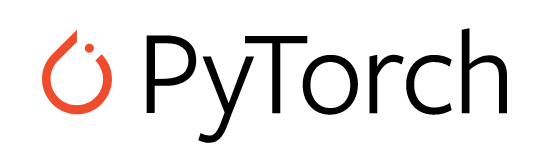

PyTorch - это оптимизированная тензорная библиотека для глубокого обучения с использованием графических и центральных процессоров

Вся методика программирования основана на использовании возможностей ООП в Python, так как программирование под PyTorch - это объявление объектов стандартных классов с заранее описаной логикой для описания процесса обработки информации нейронными сетями.

PyTorch поддерживает разработку следующих частей пайплайна обработки данных в глубоких моделях:
- объявление и преобразование тензоров данных
- описание архитектуры нейронной сети
- описание логики обработки данных в нейронной сети
- объявление опимизаторов для настройки параметров
- динамический граф вычислений для автоматического расчета градиента функций
- предобработка датасетов высокого уровня
- сохранение, загрузка и развертывание обученных моделей

За использование различных сценариев глубокого обучения отвечают всевозможные вариации подмодулей библиотеки PyTorch:
- ```torch``` - стандартный модуль разработки глубоких моделей нейронных сетей, поддерживающий описание архитекруты как на высоком уровне с узкими возможностями кастомизации, так и на достаточно низком уровне, поддерживающем описание вычислений внутри слоев глубокой модели и потока информации через модель
- ```torchvision``` - Пакет torchvision состоит из популярных наборов данных, архитектур моделей и распространенных преобразований изображений для компьютерного зрения.
- ```torchaudio``` - это библиотека для обработки звука и сигналов с помощью PyTorch. Он предоставляет функции ввода-вывода, обработки сигналов и данных, наборы данных, реализации моделей и компоненты приложений.
- ```torchtext``` - Пакет torchtext состоит из утилит обработки данных и популярных наборов данных для естественного языка.
- ```TorchData``` - это прототип библиотеки общих модульных примитивов загрузки данных для простого построения гибких и производительных конвейеров данных.
- ```torchrec``` - это доменная библиотека PyTorch, созданная для обеспечения общих примитивов разреженности и параллелизма, необходимых для крупномасштабных рекомендательных систем (RecSys). Это позволяет авторам обучать модели с большими таблицами векторных представлений, разделенными на множество графических процессоров.

В данном уроке концентрация внимания будет сосредоточена на модуле ```torch``` библиотеки **PyTorch**, поскольку она содержит наиболее общие фнукции для разработки моделей глубокого обучения

## **Установка Pytorch**

Ссылка на подробную инструкцию установки на локальной машине

https://pytorch.org/get-started/locally/

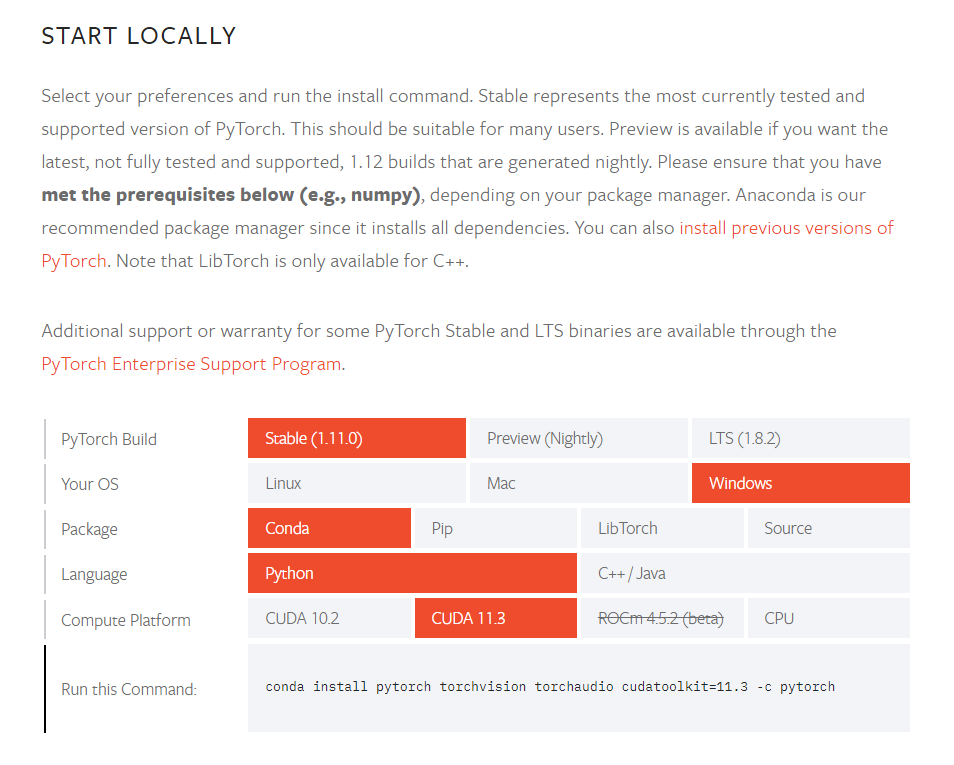

Важно знать, что для установки на локальной машине версии дистрибутива с поддержкой графической карты вам необходимо будет установить такие библиотеки от Nvidia как **CudNN** и **CudaToolkit** специальных версий, как и указано в инструкции установки в версии **CUDA**

In [ ]:
# Для установки полной версии pytorch под linux c помощью pip3 
#!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

In [ ]:
import torch                        # Фреймворк глубокого обучения
import torch.nn as nn               # Слои и функциональность блоков
import numpy as np                  # Для преобразований из массивов numpy 
import random
import matplotlib.pyplot as plt

# **Основы Pytorch**

Модуль ```torch``` библиотеки PyTorch содержит в себе несколько **интерфейсов** или **API** с различными функциональными блоками для описания частей общего пайплайна обработки данных в глубоких моделях. Перечислены самые необходимые API для описания пайплайна обработки данных:

- ```torch.Tensor``` - Класс для работы с массивами данных , перенимает общую логику работы с тензорами данных из ```numpy``` и обеспечивает работу внутренних механизмов фреймворка. Для описания пайплайна обработки данных нейросетью **необходимо работать с тензорами PyTorch**. Ссылка на референс и документацию к полям и методам: https://pytorch.org/docs/stable/tensors.html

- ```torch.nn``` - API для построения архитекруты и функциональной обработки данных внутри нейросетевых моделей. Обеспечивает классами для описания слоев нейросети, нормализаторов, функций активации и применения функциональных составляющих слоев с имеющимися параметрами к входным данным https://pytorch.org/docs/stable/nn.html

- ```torch.optim``` - API для объявления оптимизаторов для решения задачи оптимизации функции стоимости модели глубокого обучения и изменения, собственно, параметров модели. https://pytorch.org/docs/stable/optim.html?highlight=optim#module-torch.optim

- ```torch.linalg``` - стандартные операции линейной алгебры https://pytorch.org/docs/stable/linalg.html

- ```torch.fft``` - дискретное преобразование Фурье и связанная функциональность https://pytorch.org/docs/stable/fft.html

## **Работа с тензорами**

### **Создание тезноров**

Тензоры можно создавать напрямую из списков Python

In [ ]:
# Тензор из вложенного списка Python
tensor1 = torch.tensor(data=[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]], 
                       dtype=torch.float32)
print(tensor1)

tensor([[ 1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10.]])


Также из массивов numpy

In [ ]:
# Numpy массив
numpy_array = np.array([[3, 4, 9], 
                        [6, 12, 11],
                        [-7, 4, -3]])
print("Испытуемый\n", numpy_array, "\n")

# Приведение класса Тензор из numpy массива
tensor_np_copy = torch.tensor(numpy_array)
print("Тензор-копия\n", tensor_np_copy, "\n")

# Специальное приведение с указанием на ту же память
tensor_np_share = torch.from_numpy(numpy_array)
print("Тензор-указатель\n", tensor_np_share)

Испытуемый
 [[ 3  4  9]
 [ 6 12 11]
 [-7  4 -3]] 

Тензор-копия
 tensor([[ 3,  4,  9],
        [ 6, 12, 11],
        [-7,  4, -3]]) 

Тензор-указатель
 tensor([[ 3,  4,  9],
        [ 6, 12, 11],
        [-7,  4, -3]])


Попробуем изменить тензор-указатель и посмотреть на результат во всех тензорах

In [ ]:
# Изменим 2-ую строчку 1-ый элемент
tensor_np_share[1, 0] = 9

print("Испытуемый\n", numpy_array, "\n")
print("Тензор-копия\n", tensor_np_copy, "\n")
print("Тензор-указатель\n", tensor_np_share)

Испытуемый
 [[ 3  4  9]
 [ 9 12 11]
 [-7  4 -3]] 

Тензор-копия
 tensor([[ 3,  4,  9],
        [ 6, 12, 11],
        [-7,  4, -3]]) 

Тензор-указатель
 tensor([[ 3,  4,  9],
        [ 9, 12, 11],
        [-7,  4, -3]])


Исходный массив numpy и тензор-копия ```.from_numpy()``` изменили знчения, а ```torch.tensor(ndarray)``` не изменил своего значения.

### **Создание тензоров случайных значений**

In [ ]:
#датчик случайных чисел, чтобы случайные значения точно повторялись нужно использовать все эти строчки для torch
#все веса будут инициализированы при каждом запуске одинаково
seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True #режим работы cuda в детерминистическом режиме

Создание тензора целых чисел заранее заданного размера ```my_shape``` из равномерного распределения 

с помощью ```torch.randint(low = _int, high = _int, size = _size```

In [ ]:
# Кортеж, задающий размер тензора
my_shape = (10, 3)         

# Указание нижней и верхней границ и размерности тензора
tensor_randint = torch.randint(low = -9, 
                               high = 9, 
                               size = my_shape)

#создание тензора со случайными числами, но с тем же размером, что и другой тензор (tensor_randint) (передается в качестве аргумента)
tensor_randint_like = torch.randint_like(tensor_randint,-9,9)

print(tensor_randint)   
print(tensor_randint_like)       

tensor([[-5, -8,  3],
        [-9,  1,  5],
        [-9,  2, -4],
        [ 7,  8, -2],
        [ 3, -2,  1],
        [-6, -9,  6],
        [-8,  1,  7],
        [ 1, -2,  0],
        [-2, -9, -6],
        [-9,  5, -9]])
tensor([[-9, -8,  0],
        [-2,  3,  1],
        [-4, -9,  1],
        [-4,  5,  0],
        [ 7, -2,  8],
        [-2,  1, -7],
        [-9, -9, -2],
        [ 2, -3,  7],
        [ 0, -5,  2],
        [ 1,  3, -8]])


Создание тензора случайных действительных чисел  из **равномерного** распределения от 0 до 1 заранее заданного размера ```my_shape``` с помощью ```torch.rand(size = _size)```

In [ ]:
# Кортеж, задающий размер тензора
my_shape = (10, 3)    

# Указание размерности тензора
tensor_rand = torch.rand(size = my_shape)

print(tensor_rand)

tensor([[0.5789, 0.9131, 0.0275],
        [0.1634, 0.3009, 0.5201],
        [0.3834, 0.4451, 0.0126],
        [0.7341, 0.9389, 0.8056],
        [0.1459, 0.0969, 0.7076],
        [0.5112, 0.7050, 0.0114],
        [0.4702, 0.8526, 0.7320],
        [0.5183, 0.5983, 0.4527],
        [0.2251, 0.3111, 0.1955],
        [0.9153, 0.7751, 0.6749]])


Создание тензора случайных действительных чисел  из **нормального** распределения c $\mu = 0$ и $\sigma^2 = 1$ заранее заданного размера ```my_shape``` с помощью ```torch.randn(size = _size)```

In [ ]:
# Кортеж, задающий размер тензора
my_shape = (10, 3)    

# Указание размера тензора
tensor_randn = torch.randn(size = my_shape)

print(tensor_randn)

tensor([[ 0.4046, -1.6461,  1.0720],
        [ 1.5026, -0.8190,  0.2686],
        [-2.2150, -1.3193, -0.2901],
        [ 1.2767, -0.9948,  1.2176],
        [-0.2282,  1.3382, -0.5872],
        [ 1.1952, -1.2096, -0.5560],
        [-2.7202,  0.5421, -1.1541],
        [ 0.7763, -0.7067, -0.9222],
        [ 3.8954, -0.6027, -0.0480],
        [ 0.5349,  1.1031,  1.3334]])


### **Создание тензоров из итераторов**

Создание тензора размерности 1 (вектора) из перечислений от **start** (включительно) до **end** (не включительно) с фиксированным шагом **step** с помощью ```torch.arange()```. 

Работает схожим образом с ```numpy.arange()```.

In [ ]:
tensor_range = torch.arange(start = 1, end = 19, step = 0.25)
print(tensor_range)

tensor([ 1.0000,  1.2500,  1.5000,  1.7500,  2.0000,  2.2500,  2.5000,  2.7500,
         3.0000,  3.2500,  3.5000,  3.7500,  4.0000,  4.2500,  4.5000,  4.7500,
         5.0000,  5.2500,  5.5000,  5.7500,  6.0000,  6.2500,  6.5000,  6.7500,
         7.0000,  7.2500,  7.5000,  7.7500,  8.0000,  8.2500,  8.5000,  8.7500,
         9.0000,  9.2500,  9.5000,  9.7500, 10.0000, 10.2500, 10.5000, 10.7500,
        11.0000, 11.2500, 11.5000, 11.7500, 12.0000, 12.2500, 12.5000, 12.7500,
        13.0000, 13.2500, 13.5000, 13.7500, 14.0000, 14.2500, 14.5000, 14.7500,
        15.0000, 15.2500, 15.5000, 15.7500, 16.0000, 16.2500, 16.5000, 16.7500,
        17.0000, 17.2500, 17.5000, 17.7500, 18.0000, 18.2500, 18.5000, 18.7500])


Создание тензора размерности 1 (вектора) из перечислений от **start** (включительно) до **end** (включительно) с фиксированным количеством шагов **steps** с помощью ```torch.linspace()```. 

Работает схожим образом с ```numpy.linspace()```.

In [ ]:
tensor_grid = torch.linspace(start = -9., end = 9., steps = 45)
print(tensor_grid)

tensor([-9.0000, -8.5909, -8.1818, -7.7727, -7.3636, -6.9545, -6.5455, -6.1364,
        -5.7273, -5.3182, -4.9091, -4.5000, -4.0909, -3.6818, -3.2727, -2.8636,
        -2.4545, -2.0455, -1.6364, -1.2273, -0.8182, -0.4091,  0.0000,  0.4091,
         0.8182,  1.2273,  1.6364,  2.0455,  2.4545,  2.8636,  3.2727,  3.6818,
         4.0909,  4.5000,  4.9091,  5.3182,  5.7273,  6.1364,  6.5455,  6.9545,
         7.3636,  7.7727,  8.1818,  8.5909,  9.0000])


Создание нулевой и единичной матриц

In [ ]:
# Задание размерности
my_shape = (4, 6)

# Создание единичной и нулевой матрицы по заданной размерности
zero_tensor = torch.zeros(my_shape)
ones_tensor = torch.ones(my_shape)

print(zero_tensor)
print(ones_tensor)

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])
tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])


### **Изменение размерности тензоров**

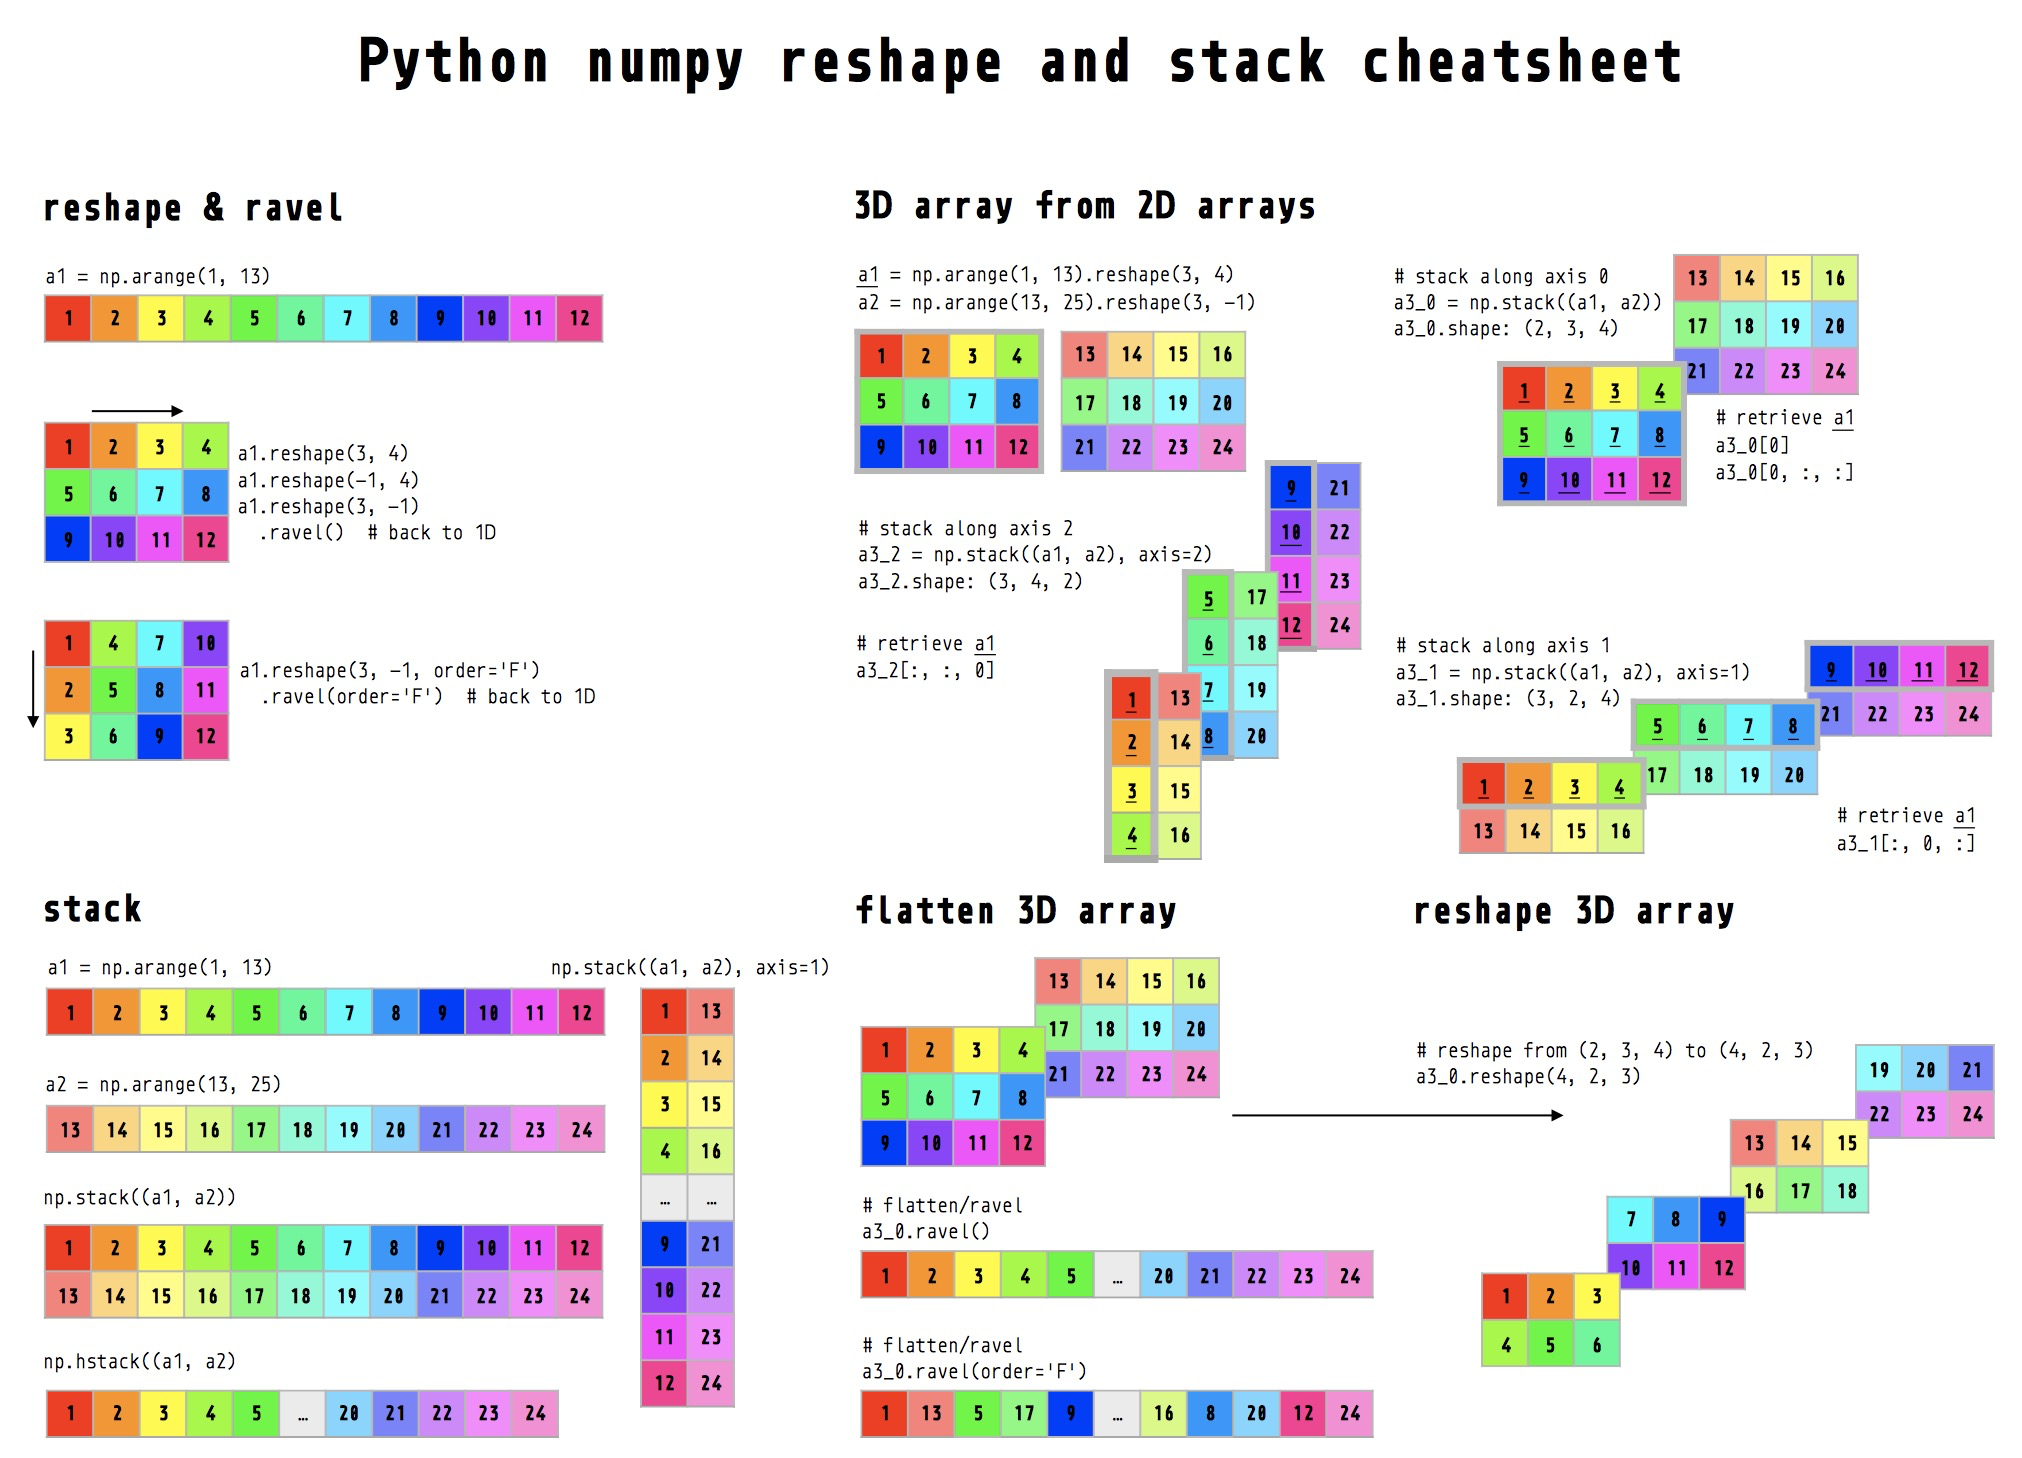

Размерность уже созданных тензоров можно изменить применив стандартный метод массивов **numpy** типа ```reshape```:

In [ ]:
# Объявление различных размерностей для тензора
shape_1 = (10, 6)
shape_2 = (12, 5)
shape_3 = (-1, 15) # (-1) у тензора будет 15 столбцов и сколько то строк, количество строк определится автоматически

# Создание тензора размерности shape_1
new_tensor = torch.randint(-1, 1, shape_1)
print(new_tensor, "\n")     # Просмотр созданного тензора
print(new_tensor.shape)     # Просмотр размерности созданного тензора (значения поля)

tensor([[-1, -1,  0, -1,  0,  0],
        [-1, -1,  0, -1,  0,  0],
        [ 0,  0, -1,  0, -1,  0],
        [-1, -1,  0,  0, -1,  0],
        [ 0,  0, -1,  0,  0,  0],
        [ 0, -1, -1,  0,  0, -1],
        [-1,  0, -1, -1, -1,  0],
        [-1,  0,  0, -1, -1, -1],
        [ 0, -1, -1,  0, -1, -1],
        [ 0, -1, -1,  0, -1, -1]]) 

torch.Size([10, 6])


In [ ]:
# решейп в 12x5 = 10x6 новую размерность shape_2
new_tensor2 = new_tensor.reshape(shape_2)
print(new_tensor2, "\n")
print(new_tensor2.shape)

tensor([[-1, -1,  0, -1,  0],
        [ 0, -1, -1,  0, -1],
        [ 0,  0,  0,  0, -1],
        [ 0, -1,  0, -1, -1],
        [ 0,  0, -1,  0,  0],
        [ 0, -1,  0,  0,  0],
        [ 0, -1, -1,  0,  0],
        [-1, -1,  0, -1, -1],
        [-1,  0, -1,  0,  0],
        [-1, -1, -1,  0, -1],
        [-1,  0, -1, -1,  0],
        [-1, -1,  0, -1, -1]]) 

torch.Size([12, 5])


In [ ]:
# Свободное изменение размерности с помощью wildcard reshape
new_tensor3 = new_tensor.reshape(shape_3)
print(new_tensor3, "\n")
print(new_tensor3.shape)

tensor([[-1, -1,  0, -1,  0,  0, -1, -1,  0, -1,  0,  0,  0,  0, -1],
        [ 0, -1,  0, -1, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0],
        [ 0, -1, -1,  0,  0, -1, -1,  0, -1, -1, -1,  0, -1,  0,  0],
        [-1, -1, -1,  0, -1, -1,  0, -1, -1,  0, -1, -1,  0, -1, -1]]) 

torch.Size([4, 15])


### **Сплющивание в 1D тензор**

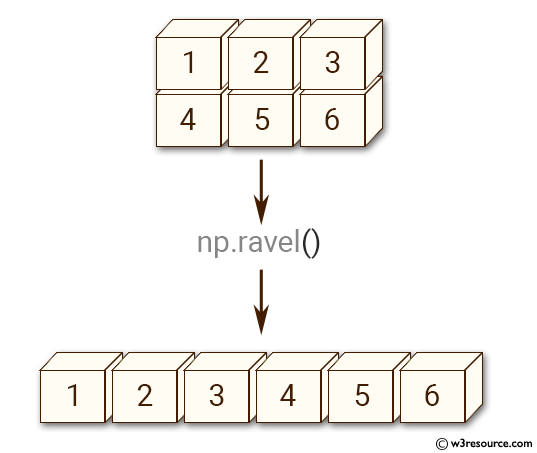

In [ ]:
# Представление тензора в виде 1D вектора по строкам
new_tensor3.ravel()

tensor([-1, -1,  0, -1,  0,  0, -1, -1,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,
        -1, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1,  0,  0, -1,
        -1,  0, -1, -1, -1,  0, -1,  0,  0, -1, -1, -1,  0, -1, -1,  0, -1, -1,
         0, -1, -1,  0, -1, -1])

In [ ]:
new_tensor4 = torch.randn(size=(3, 5, 5)) # 3 канала размера 5 на 5
new_tensor4

tensor([[[ 1.1152, -0.6172, -2.2708, -1.3819, -0.8484],
         [ 0.5323, -0.9344, -0.8431,  0.9533, -0.0130],
         [-0.1301, -0.0877,  0.4187, -1.1123,  1.1227],
         [ 0.2646,  1.2783,  0.4190, -0.5073, -0.6062],
         [ 0.4771,  0.7203, -0.0215,  1.0731,  0.9008]],

        [[ 0.4840, -1.3237,  0.7869, -1.5701,  0.0275],
         [ 1.2088,  0.6638, -0.5878, -1.1506,  1.0164],
         [ 0.1234,  0.0526, -1.1892,  0.6751, -0.5757],
         [-1.4355,  0.0727,  0.1053, -1.0311, -0.4780],
         [ 0.7995,  0.9905, -0.0730,  1.8576,  2.1321]],

        [[-0.5056, -0.7988, -1.8127,  1.1846,  1.7602],
         [ 0.7594, -0.8632,  1.3337,  0.0771,  1.6076],
         [ 1.1366,  0.9089,  0.9494,  0.0266, -0.9221],
         [ 0.7034, -0.3659,  0.5044, -0.9207,  0.3154],
         [-0.0217,  0.3441,  0.2271, -0.4597, -0.6183]]])

In [ ]:
new_tensor4.flatten(1) # мы хотим изменить тензор, чтобы стало 3 вектора с 25 значениями

tensor([[ 1.1152, -0.6172, -2.2708, -1.3819, -0.8484,  0.5323, -0.9344, -0.8431,
          0.9533, -0.0130, -0.1301, -0.0877,  0.4187, -1.1123,  1.1227,  0.2646,
          1.2783,  0.4190, -0.5073, -0.6062,  0.4771,  0.7203, -0.0215,  1.0731,
          0.9008],
        [ 0.4840, -1.3237,  0.7869, -1.5701,  0.0275,  1.2088,  0.6638, -0.5878,
         -1.1506,  1.0164,  0.1234,  0.0526, -1.1892,  0.6751, -0.5757, -1.4355,
          0.0727,  0.1053, -1.0311, -0.4780,  0.7995,  0.9905, -0.0730,  1.8576,
          2.1321],
        [-0.5056, -0.7988, -1.8127,  1.1846,  1.7602,  0.7594, -0.8632,  1.3337,
          0.0771,  1.6076,  1.1366,  0.9089,  0.9494,  0.0266, -0.9221,  0.7034,
         -0.3659,  0.5044, -0.9207,  0.3154, -0.0217,  0.3441,  0.2271, -0.4597,
         -0.6183]])

### **Расширение тензора в новую размерность**

При помощи метода ```.unsqueeze()``` в тензорах можно добавить фиктивную размерность к данным тензора для изменения данных под требования какой-либо обработки, например при пропуске данных в свёртку:

In [ ]:
# Тензор с которым мы будем работать
print(new_tensor)

tensor([[-1, -1,  0, -1,  0,  0],
        [-1, -1,  0, -1,  0,  0],
        [ 0,  0, -1,  0, -1,  0],
        [-1, -1,  0,  0, -1,  0],
        [ 0,  0, -1,  0,  0,  0],
        [ 0, -1, -1,  0,  0, -1],
        [-1,  0, -1, -1, -1,  0],
        [-1,  0,  0, -1, -1, -1],
        [ 0, -1, -1,  0, -1, -1],
        [ 0, -1, -1,  0, -1, -1]])


В метод ```.unsqueeze(int)``` надо передать целочисленное значения индекса размерности от **0** до **(dim)** в каком месте необходимо создать данную фиктивную размерность

In [ ]:
new_tensor.unsqueeze(0).shape       # Добавление фиктивной размерности к матрицам

torch.Size([1, 10, 6])

In [ ]:
print(new_tensor.unsqueeze(1).shape)       # Добавление фиктивной размерности к строкам
new_tensor.unsqueeze(1)

tensor([[[-1, -1,  0, -1,  0,  0]],

        [[-1, -1,  0, -1,  0,  0]],

        [[ 0,  0, -1,  0, -1,  0]],

        [[-1, -1,  0,  0, -1,  0]],

        [[ 0,  0, -1,  0,  0,  0]],

        [[ 0, -1, -1,  0,  0, -1]],

        [[-1,  0, -1, -1, -1,  0]],

        [[-1,  0,  0, -1, -1, -1]],

        [[ 0, -1, -1,  0, -1, -1]],

        [[ 0, -1, -1,  0, -1, -1]]])

In [ ]:
print(new_tensor.unsqueeze(2).shape)      # Добавление фиктивной размерности к столбцам
new_tensor.unsqueeze(2)

tensor([[[-1],
         [-1],
         [ 0],
         [-1],
         [ 0],
         [ 0]],

        [[-1],
         [-1],
         [ 0],
         [-1],
         [ 0],
         [ 0]],

        [[ 0],
         [ 0],
         [-1],
         [ 0],
         [-1],
         [ 0]],

        [[-1],
         [-1],
         [ 0],
         [ 0],
         [-1],
         [ 0]],

        [[ 0],
         [ 0],
         [-1],
         [ 0],
         [ 0],
         [ 0]],

        [[ 0],
         [-1],
         [-1],
         [ 0],
         [ 0],
         [-1]],

        [[-1],
         [ 0],
         [-1],
         [-1],
         [-1],
         [ 0]],

        [[-1],
         [ 0],
         [ 0],
         [-1],
         [-1],
         [-1]],

        [[ 0],
         [-1],
         [-1],
         [ 0],
         [-1],
         [-1]],

        [[ 0],
         [-1],
         [-1],
         [ 0],
         [-1],
         [-1]]])

### **Перестановка данных в размерностях**

Создадим тензор размерностью 3x4x5, то есть 3 матрицы размерностью 4 строки и 5 столбцов для демонстрации смены размерности, а затем продемонтрируем это с помощью картинок

**БЫЛО**

In [ ]:
tensor_345 = torch.randint(-10, 10, size = (3, 4, 5))
print(tensor_345)

tensor([[[  0,   3,   3,   7,  -6],
         [  3,   1,   1, -10,   0],
         [ -8,  -6,   9,   6,   1],
         [  9,  -3,   9,   4,  -9]],

        [[  7,  -3,  -1,   3,  -5],
         [  4,  -8,  -5,   4, -10],
         [ -5,  -6,   7,   1,  -7],
         [ -3,   7,   5,  -8,   9]],

        [[  3,   5,  -8,  -2,   8],
         [  3,  -9, -10,   3,  -6],
         [  8,  -3, -10,   7,  -9],
         [  4,   2, -10,   6,  -7]]])


**СТАЛО**

In [ ]:
# Нужно указать кортеж перестановки для смены размерности
sigma = (1, 0, 2)

# Перестановка элементов в размерностях
tensor_435 = tensor_345.permute(sigma)
print(tensor_435)

# этот метод разносит тензор в один большой вектор и снова его преобразует в требуемый вид,
# было 3 матрицы размера 4 на 5, а стало 4 матрицы размера 3 на 5

tensor([[[  0,   3,   3,   7,  -6],
         [  7,  -3,  -1,   3,  -5],
         [  3,   5,  -8,  -2,   8]],

        [[  3,   1,   1, -10,   0],
         [  4,  -8,  -5,   4, -10],
         [  3,  -9, -10,   3,  -6]],

        [[ -8,  -6,   9,   6,   1],
         [ -5,  -6,   7,   1,  -7],
         [  8,  -3, -10,   7,  -9]],

        [[  9,  -3,   9,   4,  -9],
         [ -3,   7,   5,  -8,   9],
         [  4,   2, -10,   6,  -7]]])


In [ ]:
print(tensor_435.shape)

torch.Size([4, 3, 5])


## **Устройство выполнения**

Для обеспечения высокопроизводительных вычислений на python мы можем воспользоваться графическими процессорами, позволяющими быстро обрабатывать однотипные операции с тензорами.

Среда выполнения -> Сменить среду выполнения -> Аппаратный ускоритель: GPU

In [ ]:
# Проверка, доступна ли видеокарта
torch.cuda.is_available()

True

In [ ]:
#вычисление на CPU
tensor_1 = torch.randn(size=(10000, 10000), dtype=torch.float32)
tensor_2 = torch.randn(size=(10000, 10000), dtype=torch.float32)
tensor_1.matmul(tensor_2)

tensor([[  10.7517,  -22.0938,  -38.0836,  ...,  179.2189,   10.6168,
           52.4925],
        [   3.6330,  -52.6229,  -70.5900,  ...,  -26.1064,   86.6213,
         -164.5961],
        [  35.7006,   59.0087,  261.0157,  ...,  -93.4046,  -12.9688,
         -168.5576],
        ...,
        [  -0.2729,  -92.9562,  102.3139,  ...,  -35.5292, -131.6284,
          209.9335],
        [ -88.2280,  -26.1600,  151.8761,  ...,   86.6710,  -36.0926,
          100.0863],
        [  30.7201,   77.7594,  -85.4573,  ...,    5.4280,  225.7322,
         -189.7742]])

In [ ]:
#вычисление на GPU
tensor_1 = torch.randn(size=(10000, 10000), dtype=torch.float32, device="cuda:0")
tensor_2 = torch.randn(size=(10000, 10000), dtype=torch.float32, device="cuda:0")
tensor_1.matmul(tensor_2)

tensor([[ 158.9068,   25.4397,  -24.9637,  ...,   28.1158,    8.9084,
          -68.1689],
        [  -8.6483,   -9.9010,  -13.7146,  ..., -130.4852,   52.5842,
           22.6275],
        [-144.7286,   76.7397,   52.5147,  ...,  159.3286, -126.1478,
         -169.2261],
        ...,
        [ -55.2411,   86.4257,   -0.5928,  ...,    7.5478, -151.9619,
          -22.9740],
        [ 106.9325,  -29.0682,  101.8536,  ...,   83.8838,   24.2076,
          112.1914],
        [  18.1889, -126.4889,    8.5180,  ...,  114.6810,  -16.1614,
         -154.4677]], device='cuda:0')

В PyTorch runtime возможен выбор между разными устройствами вычислений для обработки информации через нейронные модели. Зачастую, прибегают как раз к выполнению вычислений на графических картах (GPU) или тензорных ускорителях (TPU) перед центральными процессорами ввиду их можности вычислений на суперскалярных архитектурах по сравнению с универсальностью обработки данных на процессорах. 

Выбор устройства можно производить при создании тензора или изменении тензора. Вычисления над тензорами, находящимися на разных устройствах выполнения недопустимы. Для возможности проведения вычислений на GPU необходимо и веса моделей (объекты моделей) и тензоры данных динамически перекидывать на GPU и производить с ними вычисления.

Для возможност иопределения устройства выполнения имеется возмонжость перекинуть тензор или объект модели на устройство при помощи метода ```object.to(device = "cuda:0")```

Здесь в качестве аргумента можно указывать как строку, так и объект ```torch.device``` определяемый соответствующим образом:

In [ ]:
# Устройство вычисления CPU
device_cpu = torch.device("cpu")
print("CPU device is:", device_cpu)

# Устройство вычисления GPU
device_gpu = torch.device("cuda:0")
print("GPU device is:", device_gpu)

# Универсальное определение устройства вычисления, под среду выполнения
device_universal = torch.device('cuda:0' 
                                if torch.cuda.is_available() 
                                else 'cpu')
print("Univ device is:", device_universal)

CPU device is: cpu
GPU device is: cuda:0
Univ device is: cuda:0


Создание тензоров на устройствах

In [ ]:
# Тензор в оперативной памяти компьютера
tensor_cpu = torch.tensor(data=[[1, 0, 1], [-2, 0, -2], [1, 0, 1]],
                          dtype=torch.float16,
                          device=device_cpu,
                          requires_grad=True)
print(tensor_cpu, "\n")

# Тензор в оперативной памяти видеокарты
tensor_gpu = torch.tensor(data=[[1, -2, 1], [0, 0, 0], [1, -2, 1]],
                          dtype=torch.float16,
                          device=device_gpu,
                          requires_grad=True)
print(tensor_gpu, "\n")

# Создание тензора на выбранном девайсе под среду
tensor_uni = torch.rand(size=(3, 3), 
                        dtype=torch.float32, 
                        device=device_universal,
                        requires_grad=True)

# requires_grad=True если хотим вычислять градиент на этом тензоре, по умолчанию requires_grad=Falce
print(tensor_uni, "\n")

tensor([[ 1.,  0.,  1.],
        [-2.,  0., -2.],
        [ 1.,  0.,  1.]], dtype=torch.float16, requires_grad=True) 

tensor([[ 1., -2.,  1.],
        [ 0.,  0.,  0.],
        [ 1., -2.,  1.]], device='cuda:0', dtype=torch.float16,
       requires_grad=True) 

tensor([[0.1041, 0.8001, 0.8983],
        [0.2043, 0.2701, 0.8716],
        [0.6072, 0.6120, 0.2904]], device='cuda:0', requires_grad=True) 



## **Применение активаций к тензорам пакета pytorch**

https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

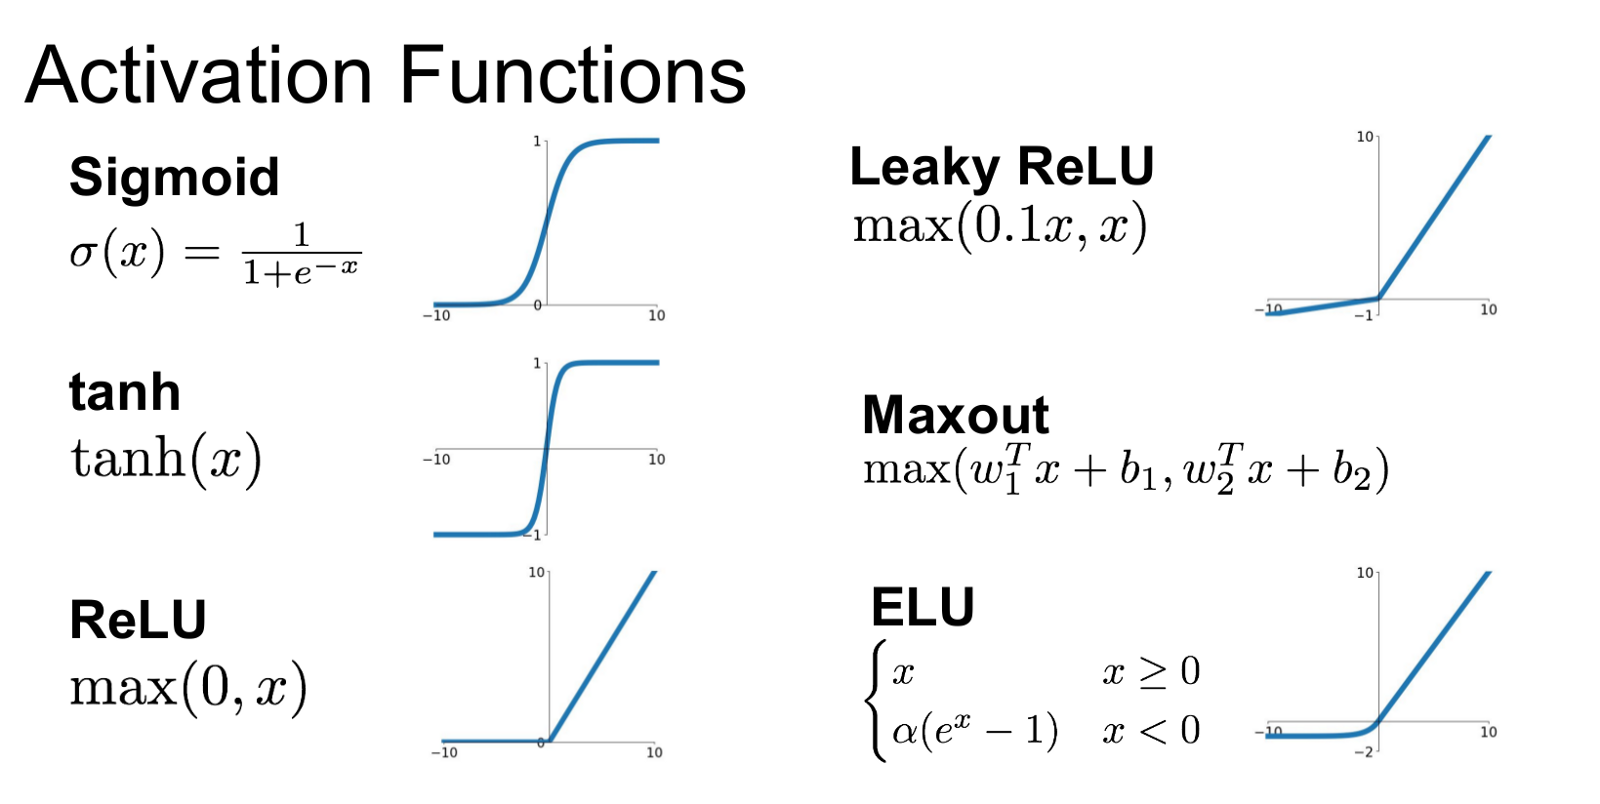

In [ ]:
import random

In [ ]:
seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

tensor_x = torch.randn((3, 3))
print(tensor_x)

tensor([[-0.1115,  0.1204, -0.3696],
        [-0.2404, -1.1969,  0.2093],
        [-0.9724, -0.7550,  0.3239]])


In [ ]:
# Применение функции sigmoid к тензору
torch.sigmoid(tensor_x)

tensor([[0.4722, 0.5301, 0.4086],
        [0.4402, 0.2320, 0.5521],
        [0.2744, 0.3197, 0.5803]])

In [ ]:
# Применение функции relu к тензору
torch.relu(tensor_x)

tensor([[0.0000, 0.1204, 0.0000],
        [0.0000, 0.0000, 0.2093],
        [0.0000, 0.0000, 0.3239]])

In [ ]:
# Применение softmax по строкам матрицы.
torch.softmax(tensor_x, dim=1) # нужно указать dim, чтобы нормировать определнный вектор, 1 - по строкам, 0 - по столбцам

tensor([[0.3297, 0.4157, 0.2547],
        [0.3387, 0.1302, 0.5311],
        [0.1695, 0.2107, 0.6198]])

## **Слои пакета pytorch**

Стандартно в pytorch реализованы различные слои для работы и конструирования архитектуры разных по сложности глубоких моделей

 - Линейные слои: https://pytorch.org/docs/stable/nn.html#linear-layers

 - Свёрточные слои: https://pytorch.org/docs/stable/nn.html#convolution-layers

 - Слои пулинга: https://pytorch.org/docs/stable/nn.html#pooling-layers

 - Паддинг слои (дополнение нулями тензора): https://pytorch.org/docs/stable/nn.html#padding-layers

 - Рекуррентные слои: https://pytorch.org/docs/stable/nn.html#recurrent-layers

 - Трансформеры: https://pytorch.org/docs/stable/nn.html#transformer-layers

 - Dropout (регуляризация): https://pytorch.org/docs/stable/nn.html#dropout-layers



В torch.nn есть классы заранее созданных слоев нейронной сети

In [ ]:
# При вызове линейного слоя можно ограничиться указанием лишь первых двух параметров,
# bias, device и dtype указываются по-надобности как и в других случаях ниже
linear_layer = nn.Linear(in_features=7, 
                         out_features=4, 
                         bias=True, 
                         device="cpu", 
                         dtype=torch.float32)
print(linear_layer.weight)
print(linear_layer.bias)

# requires_grad=True у этих тензоров, так как это слой нейронной сети, они и должны обучаться (обновляться)

Parameter containing:
tensor([[ 0.2673,  0.0704,  0.1034,  0.3648, -0.1705,  0.1197, -0.1682],
        [ 0.2701,  0.3019, -0.3485,  0.3226,  0.1805,  0.1647,  0.1556],
        [ 0.3142, -0.0499, -0.3196, -0.1085, -0.2662,  0.0250, -0.0706],
        [-0.2027, -0.0344,  0.3581, -0.0298,  0.0120, -0.0589,  0.0594]],
       requires_grad=True)
Parameter containing:
tensor([0.3368, 0.2311, 0.1342, 0.0821], requires_grad=True)


In [ ]:
# веса в виде вектора, а не матрицы
# сворачиваем одномерные данные, а не двумерные
conv_1d_layer = nn.Conv1d(in_channels = 2, 
                          out_channels = 5, 
                          kernel_size=(4, ))

print(conv_1d_layer.weight)

Parameter containing:
tensor([[[ 0.0834,  0.1366, -0.0457, -0.3286],
         [-0.2186,  0.3018,  0.0211, -0.2864]],

        [[ 0.0558,  0.2921, -0.3341, -0.2380],
         [-0.1408,  0.0142, -0.0825, -0.0389]],

        [[-0.3447,  0.1656,  0.3103,  0.2161],
         [-0.2504, -0.2850,  0.1468,  0.0079]],

        [[ 0.1449, -0.3455, -0.0211,  0.2493],
         [ 0.1640,  0.0129,  0.0695, -0.0335]],

        [[-0.1944, -0.1336, -0.2153,  0.2937],
         [ 0.1946,  0.1236, -0.2711,  0.2728]]], requires_grad=True)


In [ ]:
conv_2d_layer = nn.Conv2d(in_channels = 3, 
                          out_channels = 5, 
                          kernel_size = (3, 3), 
                          padding = "same")
#padding = "same" - автоматически сделает такой паддинг, чтобы размер картинки после свертки сотался прежним
#in_channels - количество входных каналов
# out_channels - количество каналов, которое хотим на выходе, соответсвенно равно количеству фильтров (ядер свертки)
# kernel_size - размер ядра

In [ ]:
conv_2d_layer.weight

Parameter containing:
tensor([[[[ 0.1295,  0.1543, -0.0404],
          [ 0.1466, -0.1507,  0.0166],
          [-0.1084, -0.0449, -0.0493]],

         [[ 0.0144,  0.1752,  0.0953],
          [-0.0008,  0.1366, -0.0986],
          [ 0.0992, -0.0178, -0.0335]],

         [[ 0.0225, -0.1474,  0.0222],
          [ 0.0647,  0.1645, -0.0599],
          [ 0.0693,  0.1924, -0.0826]]],


        [[[ 0.1829, -0.0955,  0.0848],
          [ 0.0754,  0.0538,  0.1522],
          [-0.0778,  0.0506,  0.0011]],

         [[-0.1447, -0.0467, -0.1285],
          [ 0.0851,  0.0173,  0.0189],
          [-0.0584,  0.0009, -0.0599]],

         [[ 0.0553,  0.1869,  0.0292],
          [-0.0852, -0.1176,  0.0147],
          [-0.1428, -0.1447, -0.1253]]],


        [[[-0.0654,  0.0142,  0.1325],
          [ 0.0745,  0.1474, -0.1208],
          [ 0.0162, -0.1711,  0.1104]],

         [[ 0.0401,  0.1861, -0.1369],
          [ 0.1543,  0.1625,  0.1556],
          [ 0.0275,  0.1750,  0.1285]],

         [[ 0.1436, -0

### **Пример линейный слой 1х1**


In [ ]:
# Линейный слой 1x1 = Уравнение типа ax + b
line_layer = nn.Linear(1, 1) #1 вход, 1 выход
print(line_layer)
print(line_layer.bias)
print(line_layer.weight)

Linear(in_features=1, out_features=1, bias=True)
Parameter containing:
tensor([-0.9671], requires_grad=True)
Parameter containing:
tensor([[-0.0201]], requires_grad=True)


In [ ]:
# Данные для линии
tensor_x = torch.tensor(data=np.arange(0, 9, 1).reshape(-1, 1),
                        dtype=torch.float32,
                        requires_grad=True)
print(tensor_x)

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.]], requires_grad=True)


In [ ]:
# Выход линейной модели (x*w + b для каждого значения из входных данных)
line_x = line_layer(tensor_x)
print(line_x)

tensor([[-0.9671],
        [-0.9872],
        [-1.0073],
        [-1.0274],
        [-1.0475],
        [-1.0676],
        [-1.0877],
        [-1.1078],
        [-1.1279]], grad_fn=<AddmmBackward0>)


In [ ]:
loss = (line_x**2).sum()
print(loss)

tensor(9.9004, grad_fn=<SumBackward0>)


In [ ]:
loss.backward() #считаем градиент функции стоимости

In [ ]:
print("Grads in tensor")
print(tensor_x.grad)
#tensor_x = tensor_x.detach()
#print("\nGrads after detach:")
#print(tensor_x.grad)

Grads in tensor
tensor([[0.0389],
        [0.0397],
        [0.0405],
        [0.0413],
        [0.0421],
        [0.0429],
        [0.0437],
        [0.0445],
        [0.0453]])


### **Пример линейный слой 5х1**


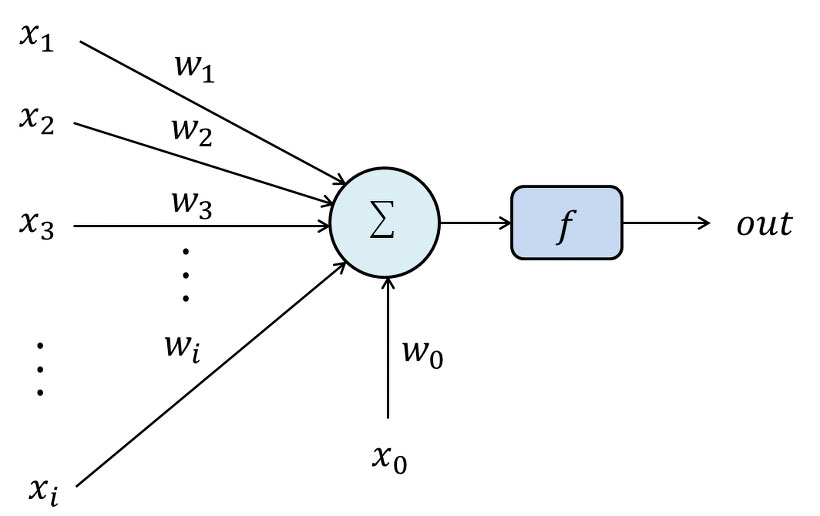

In [ ]:
# Линейный слой 5x1 = Уравнение гиперплоскости в от 5 переменных
line_layer = nn.Linear(5, 1)
print(line_layer)
print(line_layer.bias)
print(line_layer.weight)

Linear(in_features=5, out_features=1, bias=True)
Parameter containing:
tensor([0.3375], requires_grad=True)
Parameter containing:
tensor([[ 0.2406,  0.2392, -0.0843, -0.3088,  0.0180]], requires_grad=True)


In [ ]:
X = torch.cat([tensor_x, tensor_x, tensor_x, tensor_x, tensor_x], dim=1) # конкатинируем тензоры
print(X)

tensor([[0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3.],
        [4., 4., 4., 4., 4.],
        [5., 5., 5., 5., 5.],
        [6., 6., 6., 6., 6.],
        [7., 7., 7., 7., 7.],
        [8., 8., 8., 8., 8.]], grad_fn=<CatBackward0>)


In [ ]:
plane_X = line_layer(X)
print(plane_X)

tensor([[0.3375],
        [0.4422],
        [0.5469],
        [0.6515],
        [0.7562],
        [0.8609],
        [0.9656],
        [1.0703],
        [1.1750]], grad_fn=<AddmmBackward0>)


### **Пример линейный слой 5х5**


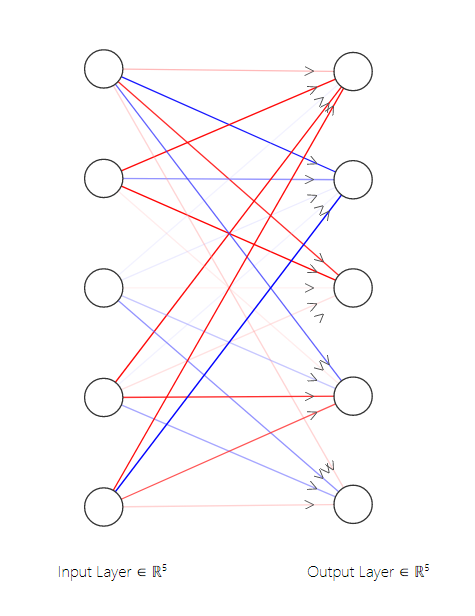

In [ ]:
# Линейный слой 5x5 = Уравнение 5-ти гиперплоскостей от 5 переменных
line_layer = nn.Linear(5, 5)
print(line_layer)
print(line_layer.bias)
print(line_layer.weight)

Linear(in_features=5, out_features=5, bias=True)
Parameter containing:
tensor([-0.1631,  0.2309,  0.1403, -0.1159, -0.1226], requires_grad=True)
Parameter containing:
tensor([[ 0.4094, -0.3376, -0.2020,  0.3482,  0.2186],
        [ 0.2768, -0.2226,  0.3853, -0.3676, -0.0215],
        [ 0.0093,  0.0751, -0.3375,  0.4103,  0.4395],
        [-0.3088,  0.0165, -0.2382,  0.4288,  0.2494],
        [ 0.2634,  0.1443, -0.0445,  0.2518,  0.0076]], requires_grad=True)


In [ ]:
X = torch.cat([tensor_x, tensor_x, tensor_x, tensor_x, tensor_x], dim=1)
print(X)

tensor([[0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [2., 2., 2., 2., 2.],
        [3., 3., 3., 3., 3.],
        [4., 4., 4., 4., 4.],
        [5., 5., 5., 5., 5.],
        [6., 6., 6., 6., 6.],
        [7., 7., 7., 7., 7.],
        [8., 8., 8., 8., 8.]], grad_fn=<CatBackward0>)


In [ ]:
plane_X = line_layer(X)
print(plane_X) #каждый столбец - это выходы для одного объекта, 5 нейронов на выходе

tensor([[-0.1631,  0.2309,  0.1403, -0.1159, -0.1226],
        [ 0.2735,  0.2812,  0.7371,  0.0318,  0.5000],
        [ 0.7101,  0.3316,  1.3338,  0.1795,  1.1225],
        [ 1.1467,  0.3819,  1.9306,  0.3272,  1.7451],
        [ 1.5833,  0.4323,  2.5274,  0.4748,  2.3676],
        [ 2.0199,  0.4826,  3.1241,  0.6225,  2.9901],
        [ 2.4565,  0.5330,  3.7209,  0.7702,  3.6127],
        [ 2.8931,  0.5833,  4.3176,  0.9179,  4.2352],
        [ 3.3297,  0.6337,  4.9144,  1.0656,  4.8577]],
       grad_fn=<AddmmBackward0>)


In [ ]:
# тоже самое но для сверточного слоя
Test_image = torch.randn(size = (3, 5, 5)).unsqueeze(0) # одна картинка с 3 каналами размера 5 на 5
conv2d_layer = torch.nn.Conv2d(in_channels=3,
                               out_channels=10,
                               kernel_size=(3, 3),
                               padding = 'same')

In [ ]:
conv2d_layer(Test_image).shape # одно изображение с тем же размером, но с 10 каналами

torch.Size([1, 10, 5, 5])

## **Оператор Собеля**

In [ ]:
sobel_x = torch.tensor(data = [[-1., 0, 1], [-2, 0, 2], [-1, 0, 1]]).repeat((3, 1, 1)) 

#repeat((3, 1, 1)) - размножили матрицу на 3 канала, сколько раз нужно повторить размерность

sobel_y = torch.tensor(data = [[-1., -2, -1], [0, 0, 0], [1, 2, 1]]).repeat((3, 1, 1))

In [ ]:
import skimage.io as io
orange = io.imread("https://polzovred.ru/wp-content/uploads/2015/04/orange_03-1024x685.jpg")

In [ ]:
orange.shape # необходимо каналы перенести вперед для свертки

(685, 1024, 3)

In [ ]:
orange = torch.tensor(orange, dtype=torch.float32).permute((2, 0 ,1))

In [ ]:
orange.unsqueeze(0).shape

torch.Size([1, 3, 685, 1024])

In [ ]:
orange_x = torch.nn.functional.conv2d(input = orange, weight=sobel_x.unsqueeze(0), padding=1)

In [ ]:
orange_x.shape

torch.Size([1, 685, 1024])

In [ ]:
orange_y = torch.nn.functional.conv2d(input = orange, weight=sobel_y.unsqueeze(0), padding=1)

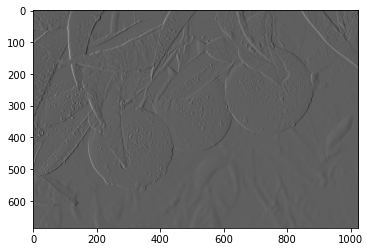

In [ ]:
plt.imshow(orange_x[0], cmap = 'gray')

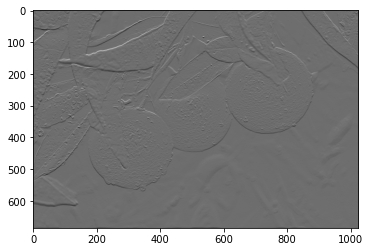

In [ ]:
plt.imshow(orange_y[0], cmap = 'gray')

In [ ]:
res = orange_x + orange_y

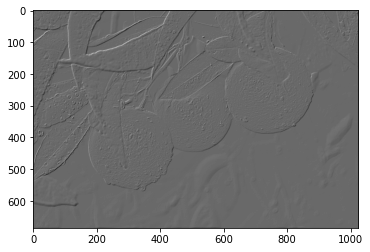

In [ ]:
plt.imshow(res[0], cmap = 'gray')

## **Функции потерь в Pytorch**

Ссылка на блок документации: https://pytorch.org/docs/stable/nn.html#loss-functions

### **Регрессия**

In [ ]:
# Функции потерь для регрессии
L2_Loss = nn.MSELoss()
L1_Loss = nn.L1Loss() #MAE

# Тесты для регрессии
model_L1 = torch.tensor(data=[[4.3252], [-3.8912]], 
                       dtype = torch.float32, requires_grad = True)    # Модель
model_L2 = torch.tensor(data=[[4.3252], [-3.8912]], 
                       dtype = torch.float32, requires_grad = True)    # Модель
target_R = torch.tensor(data=[[6.], [-4.]], 
                        dtype = torch.float32, requires_grad = False)  # Целевые

# Подсчёт значений функции потерь от модельных значений и целевых значений
L1 = L1_Loss(model_L1, target_R)
L2 = L2_Loss(model_L2, target_R)

# Результаты
print("Results")
print("L1:", L1)
print("L2:", L2)

# Градиенты
print("\nGrads")
L2.backward()       # Считаем градиенты на каждом тензоре с requires_grad = True
print("gradient L2:", model_L2.grad)    # В .grad хранятся значения градиентов

L1.backward()       # Считаем градиенты на каждом тензоре с requires_grad = True
print("gradient L1:", model_L1.grad)    # В .grad хранятся значения градиентов

Results
L1: tensor(0.8918, grad_fn=<L1LossBackward0>)
L2: tensor(1.4084, grad_fn=<MseLossBackward0>)

Grads
gradient L2: tensor([[-1.6748],
        [ 0.1088]])
gradient L1: tensor([[-0.5000],
        [ 0.5000]])


### **Классификация**

In [ ]:
# Функции потерь для классификации
CEloss = nn.CrossEntropyLoss()

# Данные для теста
model_C = torch.tensor(data=[[1.123, -0.10312],
                             [0.192312, 20.9231]],
                       dtype=torch.float32, 
                       requires_grad=True)

target_C = torch.tensor(data=[0, 1],
                        dtype=torch.long,
                        requires_grad=False)

# Подсчёт значений функции потерь от модельных значений и целевых значений
CE = CEloss(model_C, target_C) # уже вычислиется софтмакс, отдельно считать не нужно

# Результаты
print("Results")
print("CE:", CE)

# Градиенты
print("\nGrads")
CE.backward()       # Считаем градиенты на каждом тензоре с requires_grad = True
print("gradient C:\n", model_C.grad)    # В .grad хранятся значения градиентов

Results
CE: tensor(0.1286, grad_fn=<NllLossBackward0>)

Grads
gradient C:
 tensor([[-1.1343e-01,  1.1343e-01],
        [ 4.9625e-10,  0.0000e+00]])


# **Нейронная сеть на Pytorch для классификации с помощью полносвязной нейронной сети**

In [ ]:
# Классы для простой работы с данными
from torch.utils.data.dataloader import DataLoader, Dataset

import pandas as pd                 # Библиотека работы с датасетами
import numpy as np                  # Библиотека работы с массивами numpy
import matplotlib.pyplot as plt     # Библиотека работы с графикой
import random                       # Библиотека для установки случайных величин
import sklearn.datasets as datasets     # Готовые датасеты для тестов

# Инструмент сэмплирования для табличных данных
from sklearn.model_selection import train_test_split   

In [ ]:
iris = datasets.load_iris()
print(iris['data'][::15])

[[5.1 3.5 1.4 0.2]
 [5.7 4.4 1.5 0.4]
 [4.8 3.1 1.6 0.2]
 [4.8 3.  1.4 0.3]
 [5.  2.  3.5 1. ]
 [6.6 3.  4.4 1.4]
 [5.5 2.6 4.4 1.2]
 [7.6 3.  6.6 2.1]
 [6.9 3.2 5.7 2.3]
 [7.7 3.  6.1 2.3]]


In [ ]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


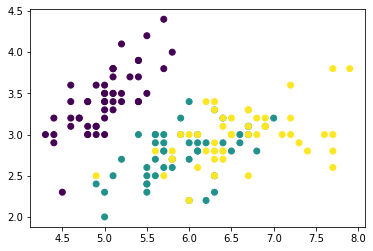

In [ ]:
plt.scatter(iris['data'][:, 0], iris['data'][:, 1], c = iris['target'])

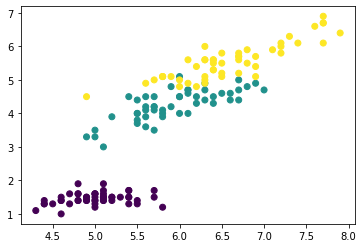

In [ ]:
plt.scatter(iris['data'][:, 0], iris['data'][:, 2], c = iris['target'])

In [ ]:
# Задаём начальное состояние генератора случайных чисел
# для всех используемых бибилотек
seed = 123                                  # Зерно
random.seed(seed)                           # Для random python
np.random.seed(seed)                        # Для random numpy
torch.manual_seed(seed)                     # Для random torch
torch.cuda.manual_seed(seed)                # Для random вычислений на видеокарте
torch.backends.cudnn.deterministic = True   # Для контроля вычислений на карте

In [ ]:
# Разбиение данных на train и test с помощью sklearn
X_train, X_test, y_train, y_test = train_test_split(iris['data'],
                                                    iris['target'],
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    random_state=seed)

In [ ]:
# Посмотрим на размерности полученных подтабличек данных
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [ ]:
# все данные заносим в тензоры, только с ними работает модель
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [ ]:
# Создание класса для реализации нейронной сети
# внутри себя класс хранит веса модели, функцию для прямого распространения данных через нейронную сеть
class fc_iris_net(nn.Module): # наследуемся от nn.Module
    # Конструктор для класса
    # Инициализация нейронной сети
    def __init__(self,
                 n_input = 4,   # Количество признаков (столбцов) данных
                 n_hidden = 2,      # Количество нейронов в скрытом слое
                 n_out = 3):        # Количество выходов классификации

        super(fc_iris_net, self).__init__()

        self.fc1 = nn.Linear(n_input, n_hidden)     # Линейный слой
        self.activ1 = nn.Sigmoid()                  # Сигмоидальная функция активации
        self.fc2 = nn.Linear(n_hidden, n_hidden)    # Линейный слой
        self.activ2 = nn.Tanh()                     # Гиперболический тангенс функция активации
        self.fc3 = nn.Linear(n_hidden, n_out)       # Линейный слой
        self.sm = nn.Softmax(dim=1)                 # Софтмакс

    # Функция прохождения данных через нейронную сеть
    def forward(self, data_input):
        x = self.fc1(data_input)      # Данные проходят через первый слой
        x = self.activ1(x)            # К выходам из слоя применяется активация
        x = self.fc2(x)               # Данные проходят через второй слой
        x = self.activ2(x)            # К выходам из слоя применяется активация
        x = self.fc3(x)               # Данные проходят через третий завершающий слой
        return x

    # Вычисление предсказаний через нейронную сеть
    # Функция принимает на вход данные как строку или подтаблицу строк,
    # На выходе оставляет класс или вектор класса, размер которого равен числу строк
    def inference(self, data_input): # не обучение, а просто результат работы нейронной сети с уже готовыми настроенными весами
        with torch.no_grad():
            x = self.forward(data_input)  # Данные пропускаются через нейронную сеть
            x = self.sm(x)                # Вычисление софтмакса
        return x

In [ ]:
# Установка экземпляра класса нейронной сети для классификации данных
iris_net = fc_iris_net(n_input=4,       # Сколько столбцов данных на входе
                       n_hidden=3,      # Размер скрытого слоя
                       n_out=3)         # Сколько столбцов данных на выходе

# Выбор loss-функции для обучения нейронной сети
loss = torch.nn.CrossEntropyLoss()

# Алгоритм обновления весов для нейронной сети
optimizer = torch.optim.Adam(params=iris_net.parameters(),
                             lr=1.0e-3)

In [ ]:
np.random.permutation(15) # перемешанные индексы в случайном порядке

array([ 7, 10,  4,  0,  5,  9,  8, 11,  3,  1,  6, 12,  2, 13, 14])

In [ ]:
batch_size = 5       # Количество прецедентов или записей данных в MBGD
epochs = 300         # Количество просмотров датасета

# Итерации по эпохам
for epoch in range(epochs):
    # В каждой эпохе зададим случайный порядок обхода датасета
    order = np.random.permutation(len(X_train)) # индексы строк, которые отправляются в нейронную сеть в случайном порядке
    # Итерируемся по порядку обхода с заданным шагом в batch_size
    for start_index in range(0, len(X_train), batch_size):
        
        # На всех тензорах, ассоциированных с оптимизатором, задаём нулевой градиент
        optimizer.zero_grad() # !!!!!!!!!!!!!!!!!!!!!!!!!! зануляем градиент, чтобы он не накапливался

        # Находим индексы строчек данных для пропуска через нейронную сеть (интервалы по 5 штук)
        batch_indexes = order[start_index:start_index+batch_size] #не самый лучший вариант, далее будет пример с dataloader

        # Выделяем пакет данных для пропуска через нейронную сеть
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]

        # Методом forward нейронной сети получаем ответ в виде модельных значений
        preds = iris_net.forward(x_batch)

        # Считаем ошибку между ответом модели и реальными данными
        loss_value = loss(preds, y_batch)

        # Для всех тензоров, участвовавших в вычислении с requires_grad=True
        # вычисляем градиент и складируем в качестве значений производной
        loss_value.backward()

        # Производим шаг оптимизатора, изменяя вес по правилу
        optimizer.step()

    # На каждой 5-ой эпохе смотрим качество модели на тесте
    if epoch % 5 == 0:
        test_preds = iris_net.forward(X_test)
        test_preds = test_preds.argmax(dim=1) #выход, где наибольшее значение, то есть класс, который предсказывает модель
        print((test_preds == y_test).float().mean())# Так как классы сбалансированы, то можем использовать accuracy

tensor(0.2105)
tensor(0.2105)
tensor(0.2105)
tensor(0.2105)
tensor(0.4737)
tensor(0.6316)
tensor(0.6316)
tensor(0.6316)
tensor(0.6316)
tensor(0.7895)
tensor(0.9737)
tensor(0.9211)
tensor(0.9211)
tensor(0.9211)
tensor(0.9474)
tensor(0.9474)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9737)
tensor(0.9474)
tensor(0.9474)
tensor(0.9474)
tensor(0.9474)
tensor(0.9474)
tensor(0.9474)
tensor(0.9211)
tensor(0.9474)
tensor(0.9474)
tensor(0.9211)
tensor(0.9474)
tensor(0.9474)
tensor(0.9474)
tensor(0.9474)
tensor(0.9474)
tensor(0.9474)
tensor(0.9211)
tensor(0.9211)
tensor(0.9474)
tensor(0.9211)
tensor(0.9474)
tensor(0.9211)
tensor(0.9211)
tensor(0.9211)
tensor(0.9211)
tensor(0.9211)
tensor(0.9211)
tensor(0.9211)
tensor(0.9211)
tensor(0.9211)
tensor(0.9211)


# **Нейронная сеть на Pytorch для классификации с помощью полносвязной нейронной сети**


In [ ]:
# Классы для простой работы с данными
from torch.utils.data.dataloader import DataLoader, Dataset

import pandas as pd                 # Библиотека работы с датасетами
import numpy as np                  # Библиотека работы с массивами numpy
import matplotlib.pyplot as plt     # Библиотека работы с графикой
import random                       # Библиотека для установки случайных величин
import sklearn.datasets as datasets     # Готовые датасеты для тестов

# Инструмент сэмплирования для табличных данных
from sklearn.model_selection import train_test_split   

In [ ]:
# Опции, оформленные в виде компактной переменной
net_options = {"seed": 122,
               "test_size": 0.25,
               "n_hidden": 6,
               "batch_size": 3,
               "epochs": 400,
               "lr": 0.0002}

In [ ]:
seed = net_options['seed']                  # Зерно
random.seed(seed)                           # Для random python
np.random.seed(seed)                        # Для random numpy
torch.manual_seed(seed)                     # Для random torch
torch.cuda.manual_seed(seed)                # Для random вычислений на видеокарте
torch.backends.cudnn.deterministic = True   # Для контроля вычислений на карте

In [ ]:
# Создание класса для реализации нейронной сети
class fc_net(nn.Module):
    # Конструктор для класса
    # Инициализация нейронной сети
    def __init__(self,
                 n_input = 4,   # Количество признаков (столбцов) данных
                 n_hidden = 3,      # Количество нейронов в скрытом слое
                 n_out = 3):        # Количество выходов классификации

        super(fc_net, self).__init__()
        self.fc1 = nn.Linear(n_input, n_hidden)     # Линейный слой
        self.activ1 = nn.Sigmoid()                  # Сигмоидальная функция активации
        self.fc2 = nn.Linear(n_hidden, n_hidden)    # Линейный слой
        self.activ2 = nn.Sigmoid()                  # Сигмоидальная функция активации
        self.fc3 = nn.Linear(n_hidden, n_out)       # Линейный слой
        self.sm = nn.Softmax(dim=1)                 # Софтмакс

    # Функция прохождения информации через нейронную сеть
    def forward(self, data_input):
        x = self.fc1(data_input)      # Данные проходят через первый слой
        x = self.activ1(x)            # К выходам из слоя применяется активация
        x = self.fc2(x)               # Данные проходят через второй слой
        x = self.activ2(x)            # К выходам из слоя применяется активация
        x = self.fc3(x)               # Данные проходят через третий слой
        return x

    # Вычисление предсказаний через нейронную сеть
    # Функция принимает на вход данные как строку или подтаблицу строк,
    # На выходе оставляет класс или вектор класса, размер которого равен числу строк
    def inference(self, data_input):
        with torch.no_grad():
            x = self.forward(data_input)  # Данные пропускаются через нейронную сеть
            x = self.sm(x)                # Вычисление софтмакса
        return x

In [ ]:
cancer = datasets.load_breast_cancer()
print(cancer['data'][:5])
print(cancer['feature_names'])

# Разбиение данных на train и test с помощью sklearn
# Можно попробовать нормировать входные данные
X_train, X_test, y_train, y_test = train_test_split(cancer['data'],
                                                    cancer['target'],
                                                    test_size=0.25,
                                                    shuffle=True,
                                                    random_state=seed)

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)


In [ ]:
# Установка экземпляра класса нейронной сети для классификации данных
FCnet = fc_net(n_input=cancer['data'].shape[1],
               n_hidden=net_options['n_hidden'],
               n_out=2)
# Выбор loss-функции для обучения нейронной сети
loss = torch.nn.CrossEntropyLoss()
# Алгоритм обновления весов для нейронной сети
optimizer = torch.optim.Adam(params=FCnet.parameters(),
                             lr=net_options['lr'])



tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.6643)
tensor(0.8881)
tensor(0.9091)
tensor(0.8951)
tensor(0.8951)
tensor(0.9021)
tensor(0.9021)
tensor(0.9091)
tensor(0.8951)
tensor(0.9021)
tensor(0.9021)
tensor(0.9021)
tensor(0.8951)
tensor(0.8951)
tensor(0.9161)
tensor(0.8951)
tensor(0.9021)
tensor(0.9021)
tensor(0.8951)
tensor(0.8951)
tensor(0.9021)
tensor(0.9021)
tensor(0.8951)
tensor(0.8951)
tensor(0.9021)
tensor(0.8951)
tensor(0.9021)
tensor(0.9091)
tensor(0.9021)
tensor(0.9021)
tensor(0.9161)
tensor(0.8951)
tensor(0.9021)
tensor(0.8951)
tensor(0.9161)
tensor(0.9021)
tensor(0.9091)
tensor(0.8951)
tensor(0.8951)
tensor(0.9021)
tensor(0.9091)
tensor(0.9

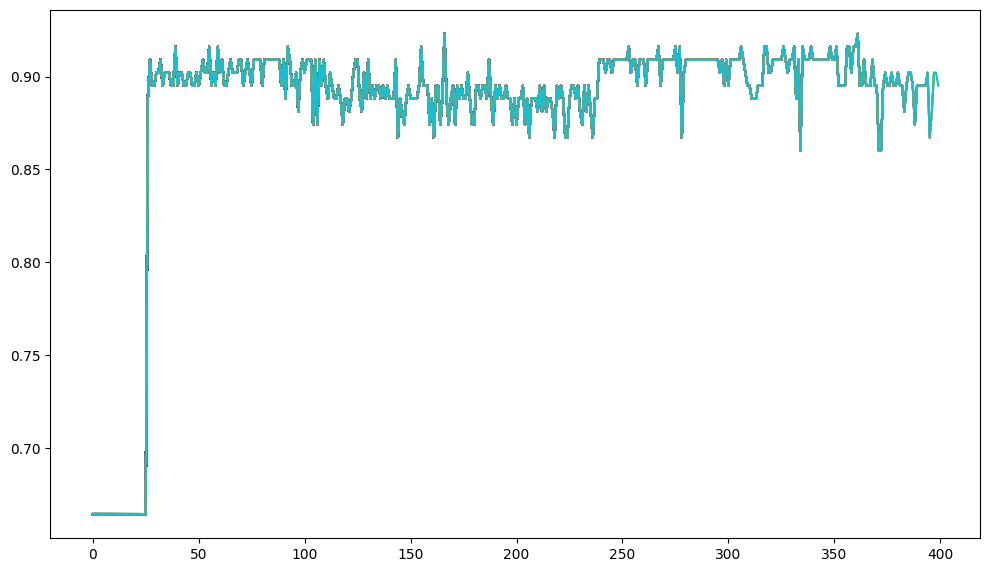

In [ ]:
batch_size = net_options['batch_size']
epochs = net_options['epochs']

test_losses = []
plt.figure(figsize=(12, 7), dpi=100)
plt.xlim = (0, epochs)
plt.ylim = (0, 1)

for epoch in range(epochs):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]

        preds = FCnet.forward(x_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = FCnet.forward(X_test)
    test_preds = test_preds.argmax(dim=1)
    test_losses.append((test_preds == y_test).float().mean())
    plt.plot(list(range(epoch + 1)), test_losses)
    print((test_preds == y_test).float().mean())

# **Регрессия на PyTorch**

In [ ]:
# Классы для простой работы с данными
from torch.utils.data.dataloader import DataLoader, Dataset

import pandas as pd                 # Библиотека работы с датасетами
import numpy as np                  # Библиотека работы с массивами numpy
import matplotlib.pyplot as plt     # Библиотека работы с графикой
import random                       # Библиотека для установки случайных величин
import sklearn.datasets as datasets     # Готовые датасеты для тестов

# Инструмент сэмплирования для табличных данных
from sklearn.model_selection import train_test_split   

In [ ]:
# Опции, оформленные в виде компактной переменной
net_options = {"seed": 121,
               "test_size": 0.25,
               "n_hidden": 8,
               "batch_size": 1,
               "epochs": 200,
               "lr": 0.001}

# Опции случайностей
seed = net_options['seed']                  # Зерно
random.seed(seed)                           # Для random python
np.random.seed(seed)                        # Для random numpy
torch.manual_seed(seed)                     # Для random torch
torch.cuda.manual_seed(seed)                # Для random вычислений на видеокарте
torch.backends.cudnn.deterministic = True   # Для контроля вычислений на карте

# Данные
data = datasets.load_diabetes()
print("Data:\n")
print(data['data'][:5])
print("\nTargets:\n")
print(data['target'][:5])
print("\nColnames\n:")
print(data['feature_names'])

# Разбиение данных на train и test с помощью sklearn
X_train, X_test, y_train, y_test = train_test_split(data['data'],
                                                    data['target'],
                                                    test_size=net_options['test_size'],
                                                    shuffle=True,
                                                    random_state=seed)

# Положить данные на torch tensor-ы
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

Data:

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]

Targets:

[151.  75. 141. 206. 135.]

Colnames
:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
# Создание класса для реализации нейронной сети
class fc_net(nn.Module):
    # Конструктор для класса
    # Инициализация нейронной сети
    def __init__(self,
                 n_input = 4,   # Количество признаков (столбцов) данных
                 n_hidden = 3,      # Количество нейронов в скрытом слое
                 n_out = 3):        # Количество выходов классификации

        super(fc_net, self).__init__()
        self.fc1 = nn.Linear(n_input, n_hidden)     # Линейный слой
        self.activ1 = nn.Tanh()                  # Сигмоидальная функция активации
        self.fc2 = nn.Linear(n_hidden, n_hidden)    # Линейный слой
        self.activ2 = nn.Tanh()                  # Сигмоидальная функция активации
        self.fc3 = nn.Linear(n_hidden, n_out)       # Линейный слой

    # Функция прохождения информации через нейронную сеть
    def forward(self, data_input):
        x = self.fc1(data_input)      # Данные проходят через первый слой
        x = self.activ1(x)            # К выходам из слоя применяется активация
        x = self.fc2(x)               # Данные проходят через второй слой
        x = self.activ2(x)            # К выходам из слоя применяется активация
        x = self.fc3(x)               # Данные проходят через третий слой
        return x

    # Вычисление предсказаний через нейронную сеть
    # Функция принимает на вход данные как строку или подтаблицу строк,
    # На выходе оставляет класс или вектор класса, размер которого равен числу строк
    def inference(self, data_input):
        with torch.no_grad():
            x = self.forward(data_input)  # Данные пропускаются через нейронную сеть
        return x

In [ ]:
# Установка экземпляра класса нейронной сети для классификации данных
FCnet = fc_net(n_input=data['data'].shape[1],
               n_hidden=net_options['n_hidden'],
               n_out=1)
# Выбор loss-функции для обучения нейронной сети
loss = torch.nn.MSELoss()
# Алгоритм обновления весов для нейронной сети
optimizer = torch.optim.Adam(params=FCnet.parameters(),
                             lr=net_options['lr'])


In [ ]:
batch_size = net_options['batch_size']
epochs = net_options['epochs']

test_losses = []

for epoch in range(epochs):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]

        preds = FCnet.forward(x_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    with torch.no_grad():
        test_preds = FCnet.forward(X_test)
        test_preds = ((test_preds - y_test)**2).mean()
        test_losses.append(test_preds)
    print(test_losses[epoch])

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(30140.8750)
tensor(29099.0898)
tensor(28241.3262)
tensor(27443.0605)
tensor(26688.2676)
tensor(25965.1543)
tensor(25262.1875)
tensor(24582.0938)
tensor(23922.6094)
tensor(23278.8750)
tensor(22651.3984)
tensor(22047.3125)
tensor(21450.9824)
tensor(20872.0293)
tensor(20314.1074)
tensor(19765.9648)
tensor(19232.4473)
tensor(18721.6836)
tensor(18220.1289)
tensor(17733.6055)
tensor(17258.4004)
tensor(16798.2148)
tensor(16357.2598)
tensor(15925.5420)
tensor(15513.4053)
tensor(15106.1631)
tensor(14719.4434)
tensor(14339.3037)
tensor(13983.4453)
tensor(13635.4297)
tensor(13289.0723)
tensor(12968.2178)
tensor(12654.7314)
tensor(12353.6094)
tensor(12063.2549)
tensor(11784.6162)
tensor(11517.5205)
tensor(11260.0967)
tensor(11015.5645)
tensor(10777.4521)
tensor(10557.3027)
tensor(10341.8789)
tensor(10135.9590)
tensor(9940.8145)
tensor(9753.7256)
tensor(9577.7969)
tensor(9405.1602)
tensor(9246.9434)
tensor(9094.9004)
tensor(8951.5283)
tensor(8813.0508)
tensor(8680.3398)
tensor(8555.6797)
ten

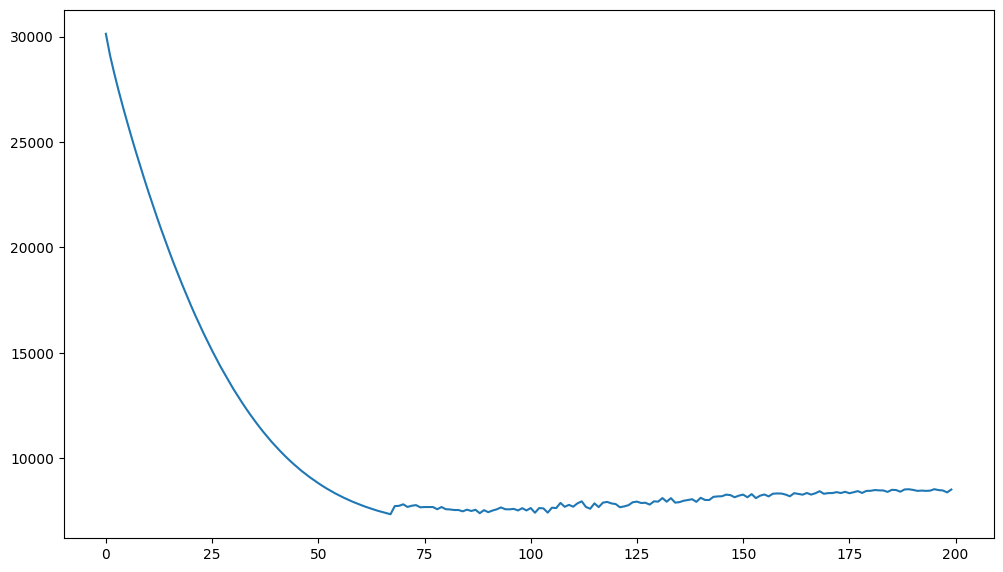

In [ ]:
plt.figure(figsize=(12, 7), dpi=100)
plt.xlim = (0, len(test_losses))
plt.plot(list(range(len(test_losses))), test_losses)

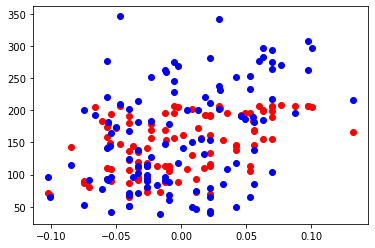

In [ ]:
plt.scatter(X_test[:, 3], np.array(FCnet.forward(X_test).detach()), c = 'r')
plt.scatter(X_test[:, 3], np.array(y_test), c = 'b')

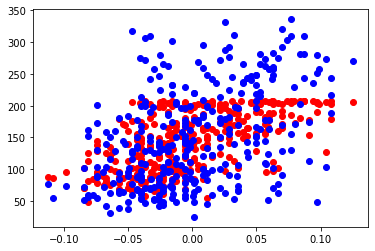

In [ ]:
plt.scatter(X_train[:, 3], np.array(FCnet.forward(X_train).detach()), c = 'r')
plt.scatter(X_train[:, 3], np.array(y_train), c = 'b')

# **MNIST при помощи последовательной модели**

In [ ]:
from torch.utils.data import DataLoader, Dataset        # Полезный модуль для загрузки данных батчами
from tqdm.notebook import tqdm      # Прогресс-бар

In [ ]:
# Начальные значения генераторов случайных чисел
seed = 3
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [ ]:
data_train = pd.read_csv("/content/sample_data/mnist_train_small.csv")
data_test = pd.read_csv("/content/sample_data/mnist_test.csv")

In [ ]:
#создаем класс
# 
class MNISTdataset(Dataset):
    def __init__(self, digits_pd):
        self.digits_pd = digits_pd #датасет
        # id объекта и его класс
        # np.stack сделает матрицу из двух массивов (id) и (метка класса) + транспонирование, чтобы были столбцы
        self.classes_outcome = pd.DataFrame(data = np.stack([np.arange(len(digits_pd)), digits_pd.iloc[:, 0].to_numpy()]).T, columns = ["Id", "Class"])
    
    def __len__(self): #переопределение метода len
        return len(self.classes_outcome)

    #переопределение того, что будет выдаваться при индексации, в данном случае будет выводится фото в виде тензора и (у) метка этого фото
    def __getitem__(self, index): 
        label = torch.tensor(int(self.classes_outcome.iloc[index, 1]))
        image = torch.tensor(self.digits_pd.iloc[index, 1:].to_numpy(), dtype=torch.float32)
        return [image, label]

In [ ]:
# теперь этот датасет мы можем использовать в dataloader
train_dataset = MNISTdataset(data_train)
test_dataset = MNISTdataset(data_test)

In [ ]:
train_dataset.classes_outcome

,Id,Class
0,0,5
1,1,7
2,2,9
3,3,5
4,4,2
...,...,...
19994,19994,0
19995,19995,1
19996,19996,2
19997,19997,9


In [ ]:
train_dataset.digits_pd

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


tensor(7)


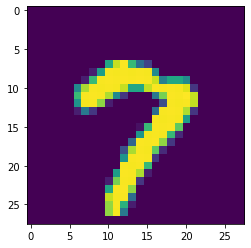

In [ ]:
#train_dataset - объект созданного класса, в итоге обращение к train_dataset[10] выдает 10-й объект и его метку y
print(train_dataset[10][1])
plt.imshow(train_dataset[10][0].reshape(28,28))

In [ ]:
# Можно поиграться здесь с параметрами обучения (гиперпараметры модели)
LEARNING_RATE = 0.001        # Скорость обучения
BATCH_SIZE = 20              # Размер подвыборки на которой будет происходить градиентный шаг
EPOCHS = 20                  # Количество полных проходов по всем картинкам из тренировочного набора при обучении нейронной сети
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [ ]:
# Мы не хотим выгружать в Python все картинки сразу, это очень затратно по памяти, поэтому лучше выбгружать картинки по требованию
# этой функции берётся стандартная функция для выбора элемента объекта по индексу, следовательно вызывается __getitem__
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)

# loss
CELoss = nn.CrossEntropyLoss()

In [ ]:
# в примерах выше мы наследовались от nn.Module
# это вариант nn.Sequential, просто задаем последовательно модель, без класса, без описания forward
model_MNIST = nn.Sequential(
    nn.Linear(784, 300),
    nn.ReLU(),
    nn.Linear(300, 50),
    nn.ReLU(),
    nn.Linear(50, 20),
    nn.ReLU(),
    nn.Linear(20, 10)
)

model_MNIST.to(device=device) # перекидываем модель на cuda

Sequential(
  (0): Linear(in_features=784, out_features=300, bias=True)
  (1): ReLU()
  (2): Linear(in_features=300, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=20, bias=True)
  (5): ReLU()
  (6): Linear(in_features=20, out_features=10, bias=True)
)

In [ ]:
#только после того, как модель отправили на cuda, задаем оптимизатор, если сделать в обратном порядке, то оптимизатор веса потеряет
# сначала указываем то место, где веса вычисляются, затем передаем веса оптимизатору
optimizer = torch.optim.Adam(model_MNIST.parameters(), lr = LEARNING_RATE)

In [ ]:
def check_accuracy(loader, model):# просто функция для оценки точности модели
    num_correct = 0
    num_samples = 0
    # Не забудьте переключиться в режим оценки!
    model.eval()
    
    with torch.no_grad():                   # Не производить обратного подсчёта градиента, чтобы сеть не училась в процессе проверки
        for data, targets in tqdm(loader):  # tqdm() это прогресс-бар, можно и без него обойтись, удалив его
            data = data.to(device)          # Перевод данных на ранее объявленное железо для просчёта всех вычислений
            targets = targets.to(device)    # Перевод целевых данных также на карточку, чтобы ошибки считались на карте
            scores = model(data)            # Прямое распространение информации по сети forwardpass
            _, predictions = scores.max(1)  # Возвращаем позицию наибольшего выхода из сети
            num_correct += (predictions == targets).sum()       # Считаем количество правильных ответов
            num_samples += predictions.size(0)                  # Количество исходных данных по просчёту процента
        print("Correct: {}, Total: {}, Accuracy: {}".format(num_correct, num_samples, int(num_correct) / int(num_samples)))
    # Не забудьте вернуться к model.train(), так как вы закончили с оценкой
    model.train()
    return (int(num_correct) / int(num_samples))

In [ ]:
# код обучения немного уменьшился, так как используем dataloader
# больше не нужно париться с порядком, с загрузкой батчами, оно само все делается с помощью dataloader, которые задали выше

data, targets = next(iter(train_loader))

accuracy_test = []
for epoch in tqdm(range(EPOCHS)):
    losses = []
    with tqdm(total=len(train_loader)) as pbar:# второй цикл с tqdm, для вывода зеленых програсс-баров
        for batch_idx, (data, targets) in enumerate(train_loader):
            optimizer.zero_grad()
            
            data = data.to(device=device)
            targets = targets.to(device=device)

            scores = model_MNIST(data)
            loss = CELoss(scores, targets)
            
            losses.append(loss)

            # backprop
            loss.backward()
            optimizer.step()

            pbar.update(1)
    
    print("Cost at epoch {} is {}".format(epoch, sum(losses) / len(losses)))
    t = check_accuracy(test_loader, model_MNIST)
    accuracy_test.append(t)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 0 is 0.4407995045185089


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9313, Total: 9999, Accuracy: 0.9313931393139314


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 1 is 0.18714000284671783


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9477, Total: 9999, Accuracy: 0.9477947794779478


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 2 is 0.1382453292608261


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9547, Total: 9999, Accuracy: 0.9547954795479549


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 3 is 0.11749938875436783


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9531, Total: 9999, Accuracy: 0.9531953195319532


  0%|          | 0/1000 [00:00<?, ?it/s]

Cost at epoch 4 is 0.10171306878328323


  0%|          | 0/500 [00:00<?, ?it/s]

Correct: 9481, Total: 9999, Accuracy: 0.9481948194819482


  0%|          | 0/1000 [00:00<?, ?it/s]

# **Классификация изображений свёрточной нейронной сетью с помощью AlexNet**

## **Импорт библиотек**

In [ ]:
!pip install -q kaggle # хотим данные загружать сразу с кагла, для этого необходимо скачать API token

Скачивание API token:

1) Войти в личный кабинет

2) Зайти в Account

3) Найти API

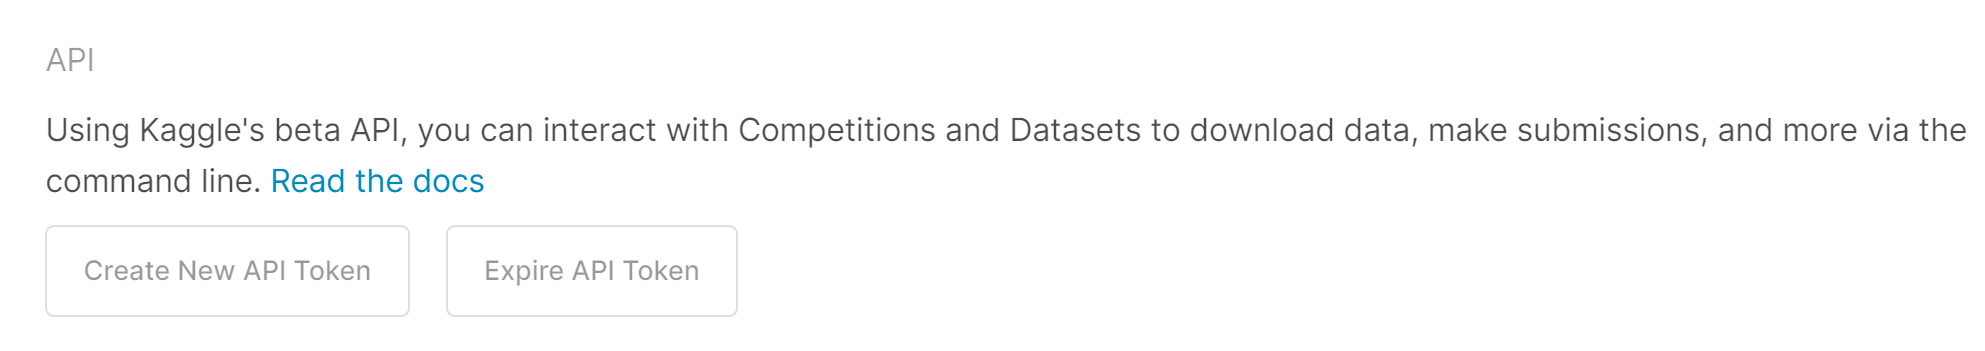

4) Создать API token, он скачается

In [ ]:
import os                           # Пути и директории в любой оперционной системе
import random                       # Случайные числа в стандартном Python 
import pandas as pd                 # Pandas для работы с таблицами данных
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, color       # Для импотра и экспорта изображений
import cv2                          # OpenCV
from PIL import Image               # Python Imaging Library 

import torch
import torch.nn as nn               # Модуль PyTorch для слоёв нейронных сетей
import torch.optim as optim         # Модуль методов оптимизации из библиотеки PyTorch
import torch.nn.functional as F     # модуль, который хранит в себе базовые операции в нейронных сетях, например выставление отступа для входного изображения, пулинги, и т.д.
import torchvision                  # Библиотека готовых решений для CV
from torchvision import transforms  # Модуль PyTorch для предобработки изображений
from torch.utils.data import DataLoader, Dataset        # Полезный модуль для загрузки данных батчами

from tqdm.notebook import tqdm      # Прогресс-бар
from google.colab import files      # Импорт файлов в colab с локального компьютера

## **Загрузка данных**

In [ ]:
files.upload() # загружаем скачанный kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anvyss","key":"755a22f28a5df345824a97c28af69d23"}'}

In [ ]:
#!!!!!!!важно, чтобы json файл находился в папке kaggle, иначе работать не будет!!!!!!!

# Создание директории kaggle
!mkdir kaggle

# Копирование файла аутентификации в папку Kaggle
!cp kaggle.json /content/kaggle

# Изменение прав доступа к файлу "kaggle.json" на 600, то есть чтение и запись для владельца, и ничего для остальных.
# 6 - 0 - 0
# 110 - 000 - 000
# rw- - --- - ---
!chmod 600 /content/kaggle/kaggle.json

mkdir: cannot create directory ‘kaggle’: File exists


In [ ]:
# Список последних просмотренных и рекомендуемых датасетов
!kaggle datasets list

ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/acoustic-extinguisher-fire-dataset                  Acoustic Extinguisher Fire Dataset               621KB  2022-04-02 22:59:36            855        639  0.9375           
datasets/muratkokludataset/rice-image-dataset                                  Rice Image Dataset                               219MB  2022-04-03 02:12:00            869        591  0.875            
datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           3355         82  1.0              


В данной работе будет показано построение свёрточной нейронной сети для задачи классификации мест на основе датасета, ссылка на который указана ниже:

https://www.kaggle.com/nitishabharathi/scene-classification

Загрузка этого датасета с kaggle выглядит следующим образом. Для этого необходимо из командной строки вызвать утилиту kaggle с опцией datasets download и в качестве аргумента указать dataset с которым вы хотите работать.

In [ ]:
!kaggle datasets download -d nitishabharathi/scene-classification # датасет классификации сцен скачиваем с кагла

scene-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!mkdir archive2

In [ ]:
# Распаковка скачанного архива в новую созданную директорию
!unzip scene-classification.zip -d archive2
!rm scene-classification.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: archive2/train-scene classification/train/5499.jpg  
  inflating: archive2/train-scene classification/train/55.jpg  
  inflating: archive2/train-scene classification/train/550.jpg  
  inflating: archive2/train-scene classification/train/5500.jpg  
  inflating: archive2/train-scene classification/train/5501.jpg  
  inflating: archive2/train-scene classification/train/5502.jpg  
  inflating: archive2/train-scene classification/train/5503.jpg  
  inflating: archive2/train-scene classification/train/5504.jpg  
  inflating: archive2/train-scene classification/train/5505.jpg  
  inflating: archive2/train-scene classification/train/5506.jpg  
  inflating: archive2/train-scene classification/train/5507.jpg  
  inflating: archive2/train-scene classification/train/5508.jpg  
  inflating: archive2/train-scene classification/train/5509.jpg  
  inflating: archive2/train-scene classification/train/551.jpg  
  inflating:

## **Описание архитектуры**

Начало построения глубокой сверточной модели по архитектуре AlexNet

In [ ]:
# Начальные значения генераторов случайных чисел
seed = 3
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

AlexNet это архитектура сверточной нейронной сети, которая используется для классификации изображений, в нашем случае будет 6 классов.

На входе изображения 224 на 224 на 3 канала, то есть для загрузки изображений в сеть необходимо их сначала преобразовать в такой размер. Далее применяется свертка плюс пулинг (maxpool), далее опять свертка и тд. В конце полносвязный слой, так как только он занимается задачей классификации.

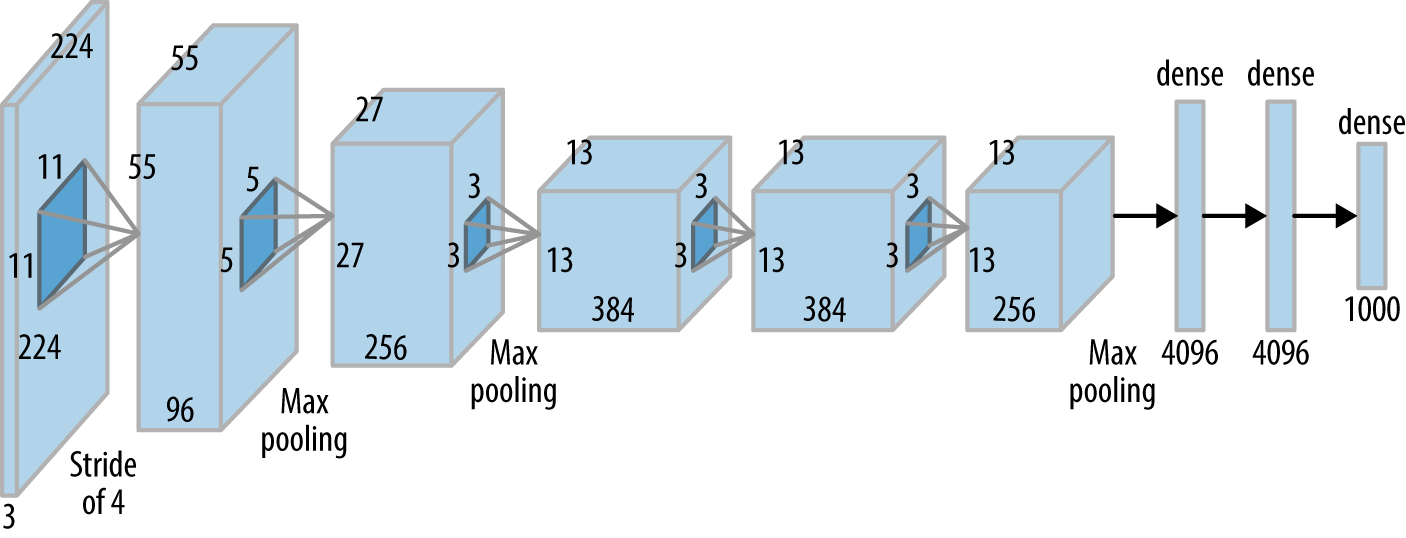

Оценивать вероятность наблюдать класс на изображении будем при помощи **Softmax**

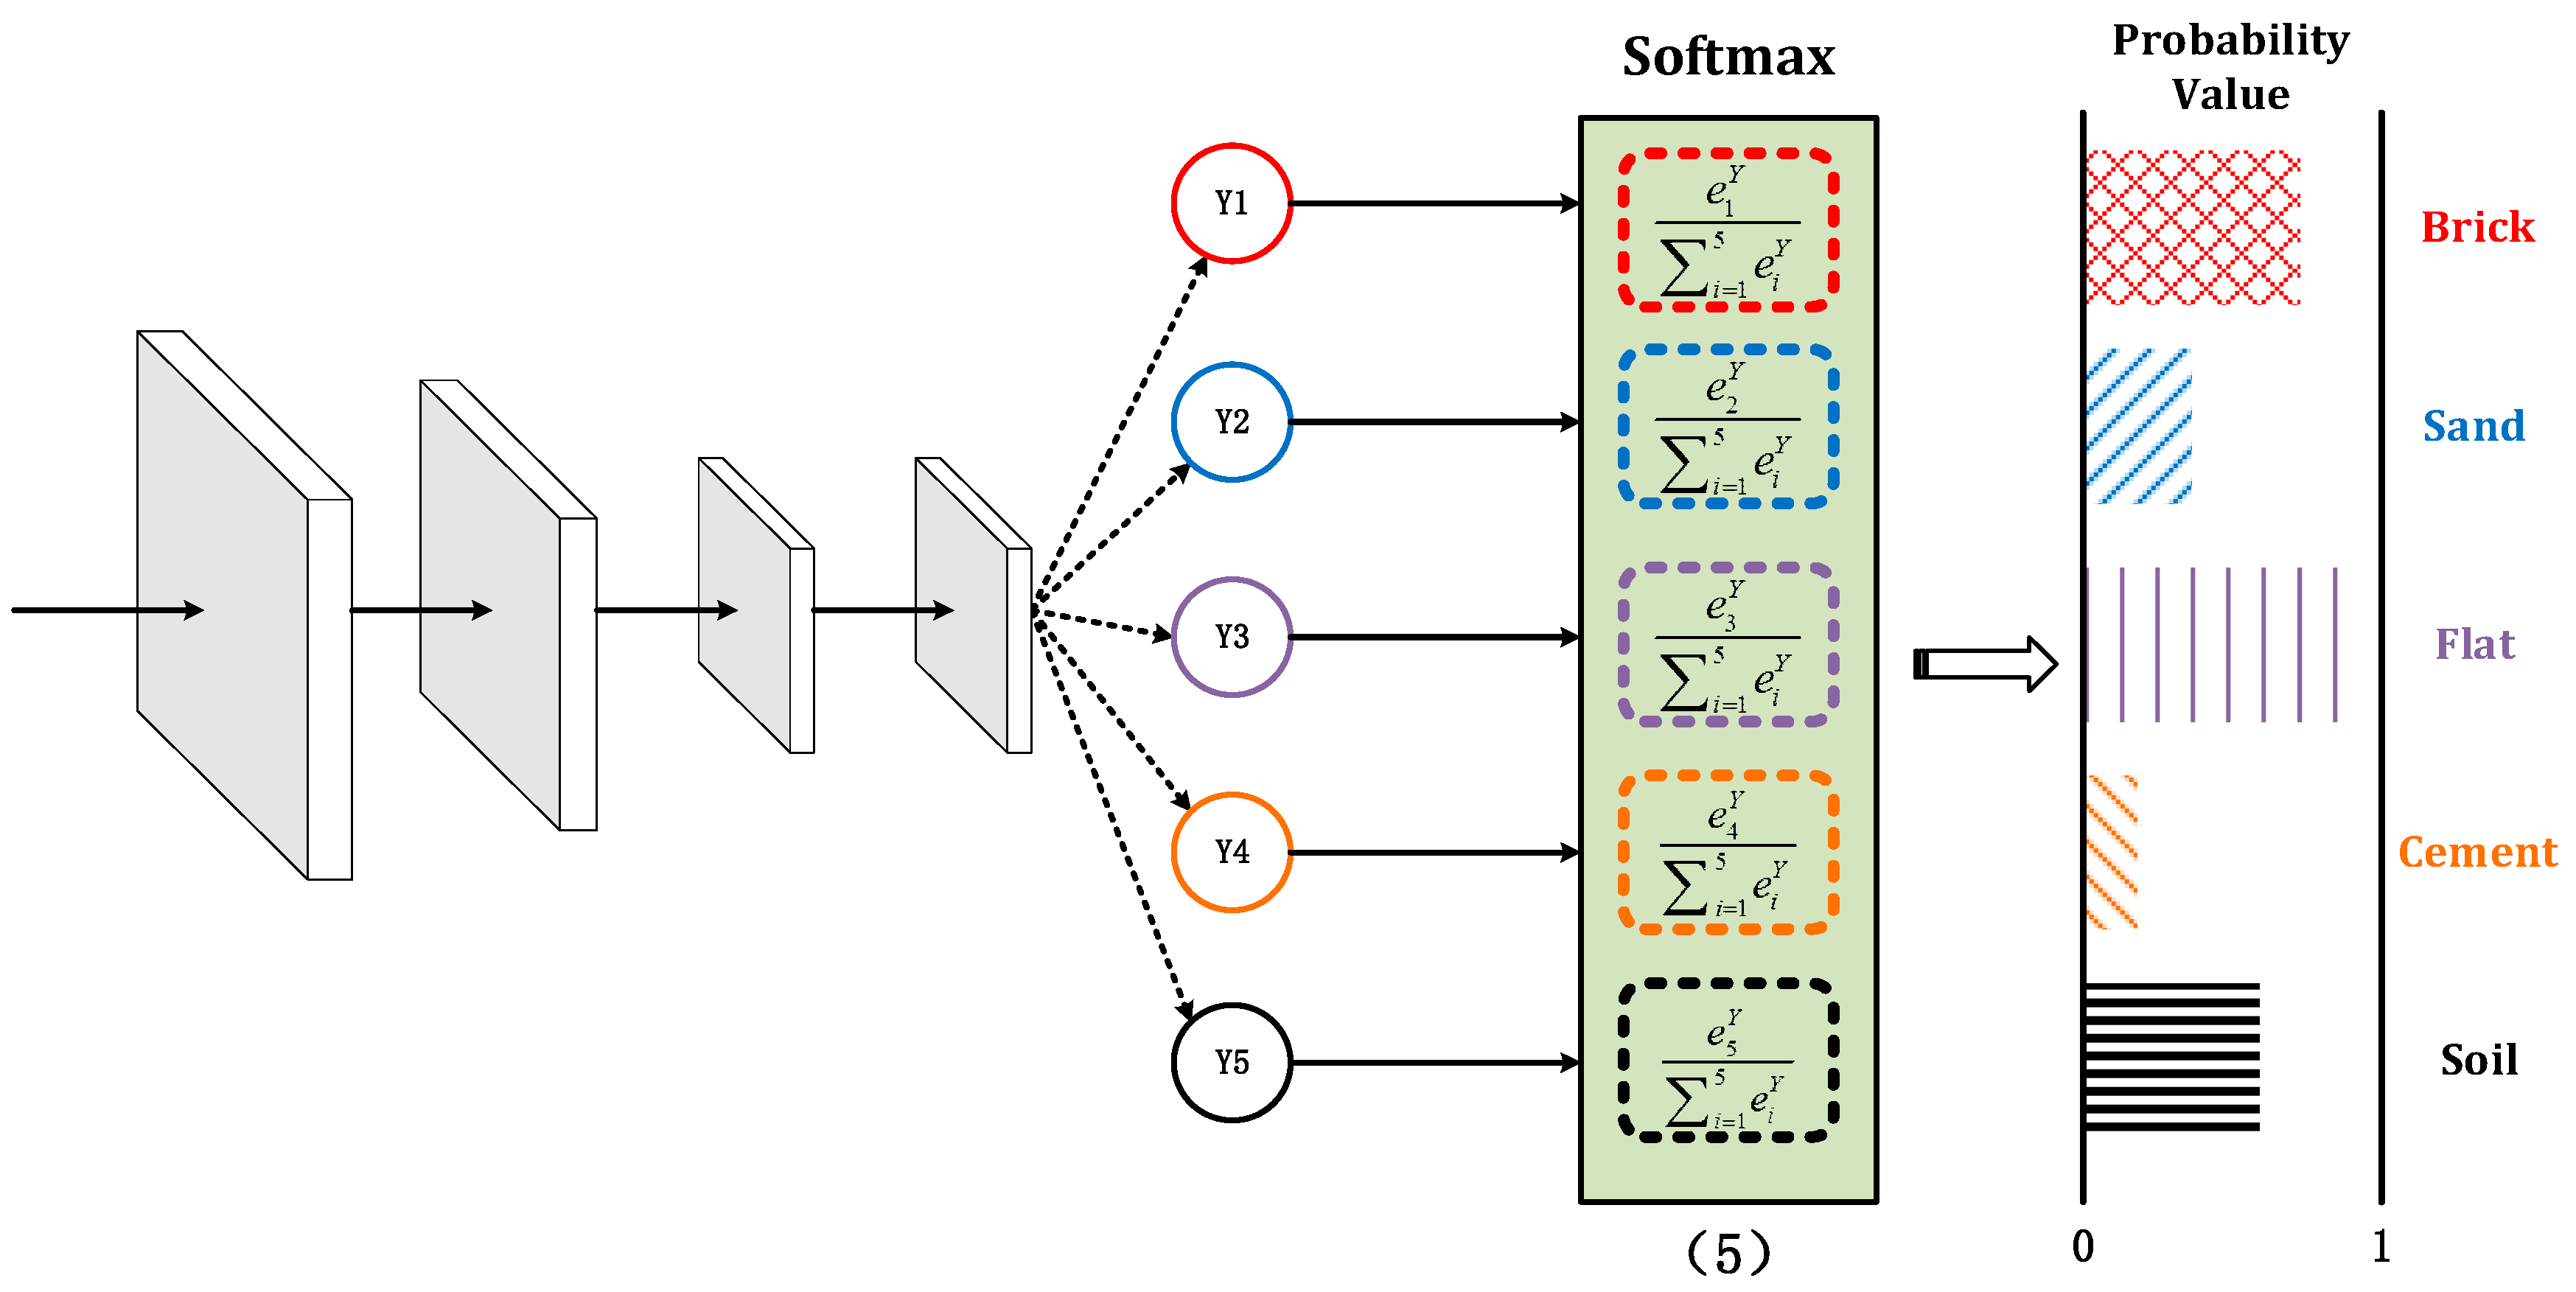

## **Перенос архитектуры на PyTorch**

In [ ]:
# Ожидается, что входной тензор будет иметь размеры (batch_size, 3, 224, 224)
class Alexnet(nn.Module):
    def __init__(self):
        
        super(Alexnet, self).__init__()
        
        # Свёрточные слои нейронной сети (просто перенесли сюда архитектуру alexnet)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=2)
        self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2)
        self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(in_features=256 * 6 * 6, out_features=4096)
        self.fc2 = nn.Linear(in_features=4096, out_features=4096)
        self.fc3 = nn.Linear(in_features=4096, out_features=6)
        
        # Действия между слоями в нейронной сети
        self.max_pool = nn.MaxPool2d(kernel_size=3, stride=2)   # Макспулинг 3х3 с шагом 2
        self.relu = nn.ReLU()                                   # функция активации ReLU
        # Этот слой помогает нам избежать вычисления размера выходной карты признаков при загрузке в линейный слой в PyTorch
        self.adaptive_pool = nn.AdaptiveAvgPool2d(output_size=(6, 6))
        
        # Реализация из библиотеки PyTorch
        self.norm = nn.LocalResponseNorm(size = 5, alpha = 1e-4, beta = 0.75, k = 1)
        # Наша реализация
        #self.norm = LocalResponseNormalization(neighbourhood_length=5, normalisation_const_alpha=1e-4, contrast_const_beta=0.75, noise_k=1.0)
        
        self.dropout = nn.Dropout()                             # Слой регуляризации перед выходом на полносвязный слой нейронной сети
    
    # Алгоритм прямого распространения информации
    def forward(self, x):
        # Первый свёрточный слой
        x = self.conv1(x)
        x = self.relu(x)
        x = self.norm(x)
        x = self.max_pool(x)

        # Второй свёрточный слой
        x = self.conv2(x)
        x = self.relu(x)
        x = self.norm(x)
        x = self.max_pool(x)
        
        # Две последовательные свёртки 3х3 без пулинга
        # третий свёрточный слой
        x = self.conv3(x)
        x = self.relu(x)
        # четвёртый свёрточный слой
        x = self.conv4(x)
        x = self.relu(x)

        # Пятый слой с adatpive pool
        x = self.conv5(x)
        x = self.relu(x)
        x = self.norm(x)
        x = self.adaptive_pool(x)

        # Сплющивание данных перед подачей в полносвязный выходной слой
        x = torch.flatten(x, 1)

        # Полносвязная нейронная сеть на выходе
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        return x

## **Класс Dataset для удобной загрузки данных из диска**

Давайте настроим собственный набор данных для нашего набора данных классификации сцен.

In [ ]:
class SceneDataset(Dataset):
    def __init__(self, annotations_csv, root_dir, transform=None):
        # Подписи к картинкам, какая картинка что обозначает
        # Поле класса, которе будет хранить csv табличку с ассоциативным списком
        self.annotations = pd.read_csv(annotations_csv)
        # Путь к директории с тренировочными картинками
        self.root_dir = root_dir
        # Операция преобразования картинок датасета для того, чтобы поместить их в нейронную сеть, так как она требует на входе картинок 224х224
        self.transform = transform
                    
    def __len__(self):
        return len(self.annotations)
    
    # Операция взятия пути к файлу, чтения и возврата ассоциативного списка из изображения и иназвания сцены
    # Переопредение стандартной операции взятия из объекта его содержимого под каким-то номером
    def __getitem__(self, index):
        # os.path.join соединяет строки между собой, образуя путь к файлу в той ОС, в которой мы работаем
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        # io.imread(img_path) по ранее созданному пути к файлу картинки, читаем картинку в python в виде числового тензора
        image = io.imread(img_path)
        # Подпись к картинке также переводим в числовой тензор
        label = torch.tensor(int(self.annotations.iloc[index, 1]))
        # Если есть трансформация входного изображения к нужным размерам, то применяем её к картинке
        if self.transform:
            image = self.transform(image)
        return [image, label]

## **Проверка точности работы модели**

Специальная функция для проверки точности на тренировочной выборке и тестовой выборке

In [ ]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    # Не забудьте переключиться в режим оценки!
    model.eval()
    
    with torch.no_grad():                   # Не производить обратного подсчёта градиента, чтобы сеть не училась в процессе проверки
        for data, targets in tqdm(loader):  # tqdm() это прогресс-бар, можно и без него обойтись, удалив его
            data = data.to(device)          # Перевод данных на ранее объявленное железо для просчёта всех вычислений
            targets = targets.to(device)    # Перевод целевых данных также на карточку, чтобы ошибки считались на карте
            scores = model(data)            # Прямое распространение информации по сети forwardpass
            _, predictions = scores.max(1)  # Возвращаем позицию наибольшего выхода из сети
            num_correct += (predictions == targets).sum()       # Считаем количество правильных ответов
            num_samples += predictions.size(0)                  # Количество исходных данных по просчёту процента
        print("Correct: {}, Total: {}, Accuracy: {}".format(num_correct, num_samples, int(num_correct) / int(num_samples)))
    # Не забудьте вернуться к model.train(), так как вы закончили с оценкой
    model.train()
    return (int(num_correct) / int(num_samples))

## **Настройка и определение гиперпараметров обучения**

In [ ]:
# Можно поиграться здесь с параметрами обучения
LEARNING_RATE = 0.001        # Скорость обучения
BATCH_SIZE = 20              # Размер подвыборки на которой будет происходить градиентный шаг
EPOCHS = 20                  # Количество полных проходов по всем картинкам из тренировочного набора при обучении нейронной сети
device = "cuda:0" if torch.cuda.is_available() else "cpu"

# Трансформации медиафайлов из библиотеки torchvision.transforms https://pytorch.org/docs/stable/torchvision/transforms.html
# Мы будем как бы прокидывать применение этой функции внутрь функции объявления датасета
transform_img = transforms.Compose([
    transforms.ToPILImage(),            # Python Imaging Library
    transforms.Resize((224, 224)),      # Принудительное сжатие и интерполяция 
    transforms.ToTensor()               # Трансформация к тензору исходных данных
])

# Инициализация созданного класса dataset
data = SceneDataset(annotations_csv="archive2/train-scene classification/train.csv",
                        root_dir="archive2/train-scene classification/train",
                        transform = transform_img)

train_data, test_data = torch.utils.data.random_split(data, [12034, 5000])      # попил на 12034/5000

# Мы не хотим выгружать в Python все картинки сразу, это очень затратно по памяти, поэтому лучше выбгружать картинки по требованию
# этой функции берётся стандартная функция для выбора элемента объекта по индексу, следовательно вызывается __getitem__
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=True)

# Объявление объекта созданной сети
alexnet = Alexnet()
# Перевод на видеокарту
alexnet.to(device)
# loss
criterion = nn.CrossEntropyLoss()
# оптимизатор Adam
optimizer = optim.Adam(alexnet.parameters(), lr=LEARNING_RATE) 

## **Код для обучения весов глубокой свёрточной сети**

In [ ]:
data, targets = next(iter(train_loader))
losses_global = []
losses_mean_epochs = []
#accuracy_train = []
accuracy_test = []
for epoch in tqdm(range(EPOCHS)):
    losses = []
    with tqdm(total=len(train_loader)) as pbar:
        for batch_idx, (data, targets) in enumerate(train_loader):     # Пара ключ-значения https://younglinux.info/python/feature/enumerate
            optimizer.zero_grad()
            data = data.to(device=device)
            targets = targets.to(device=device)

            scores = alexnet(data)
            loss = criterion(scores, targets)
            
            losses.append(loss)

            loss.backward()
            optimizer.step()
            
            pbar.update(1)
    print("Cost at epoch {} is {}".format(epoch, sum(losses) / len(losses)))
    losses_mean_epochs.append(sum(losses) / len(losses))
    #r = check_accuracy(train_loader, alexnet)
    t = check_accuracy(test_loader, alexnet)
    accuracy_test.append(t)
    #accuracy_train.append(t)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/602 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

## **Проверка работы сети**

In [ ]:
def show_image_and_prediction(img_path):
    idx2label = {0: "Buildings", 
                 1: "Forests", 
                 2: "Mountains", 
                 3: "Glacier", 
                 4: "Sea", 
                 5: "Street"}
    img = io.imread(img_path)
    transformed_img = transform_img(img)
    out = alexnet(transformed_img.unsqueeze(0).to(device=device))
    _, pred = out.max(1)
    plt.imshow(img)
    plt.show()
    print("Alexnet thinks this scence contains: {}".format(idx2label[pred.item()]))

In [ ]:
show_image_and_prediction("archive2/train-scene classification/train/10010.jpg")

In [ ]:
show_image_and_prediction("archive2/train-scene classification/train/10.jpg")

In [ ]:
show_image_and_prediction("archive2/train-scene classification/train/37.jpg")

In [ ]:
show_image_and_prediction("archive2/train-scene classification/train/45.jpg")

In [ ]:
show_image_and_prediction("archive2/train-scene classification/train/10011.jpg")